# Part 1: Introduction


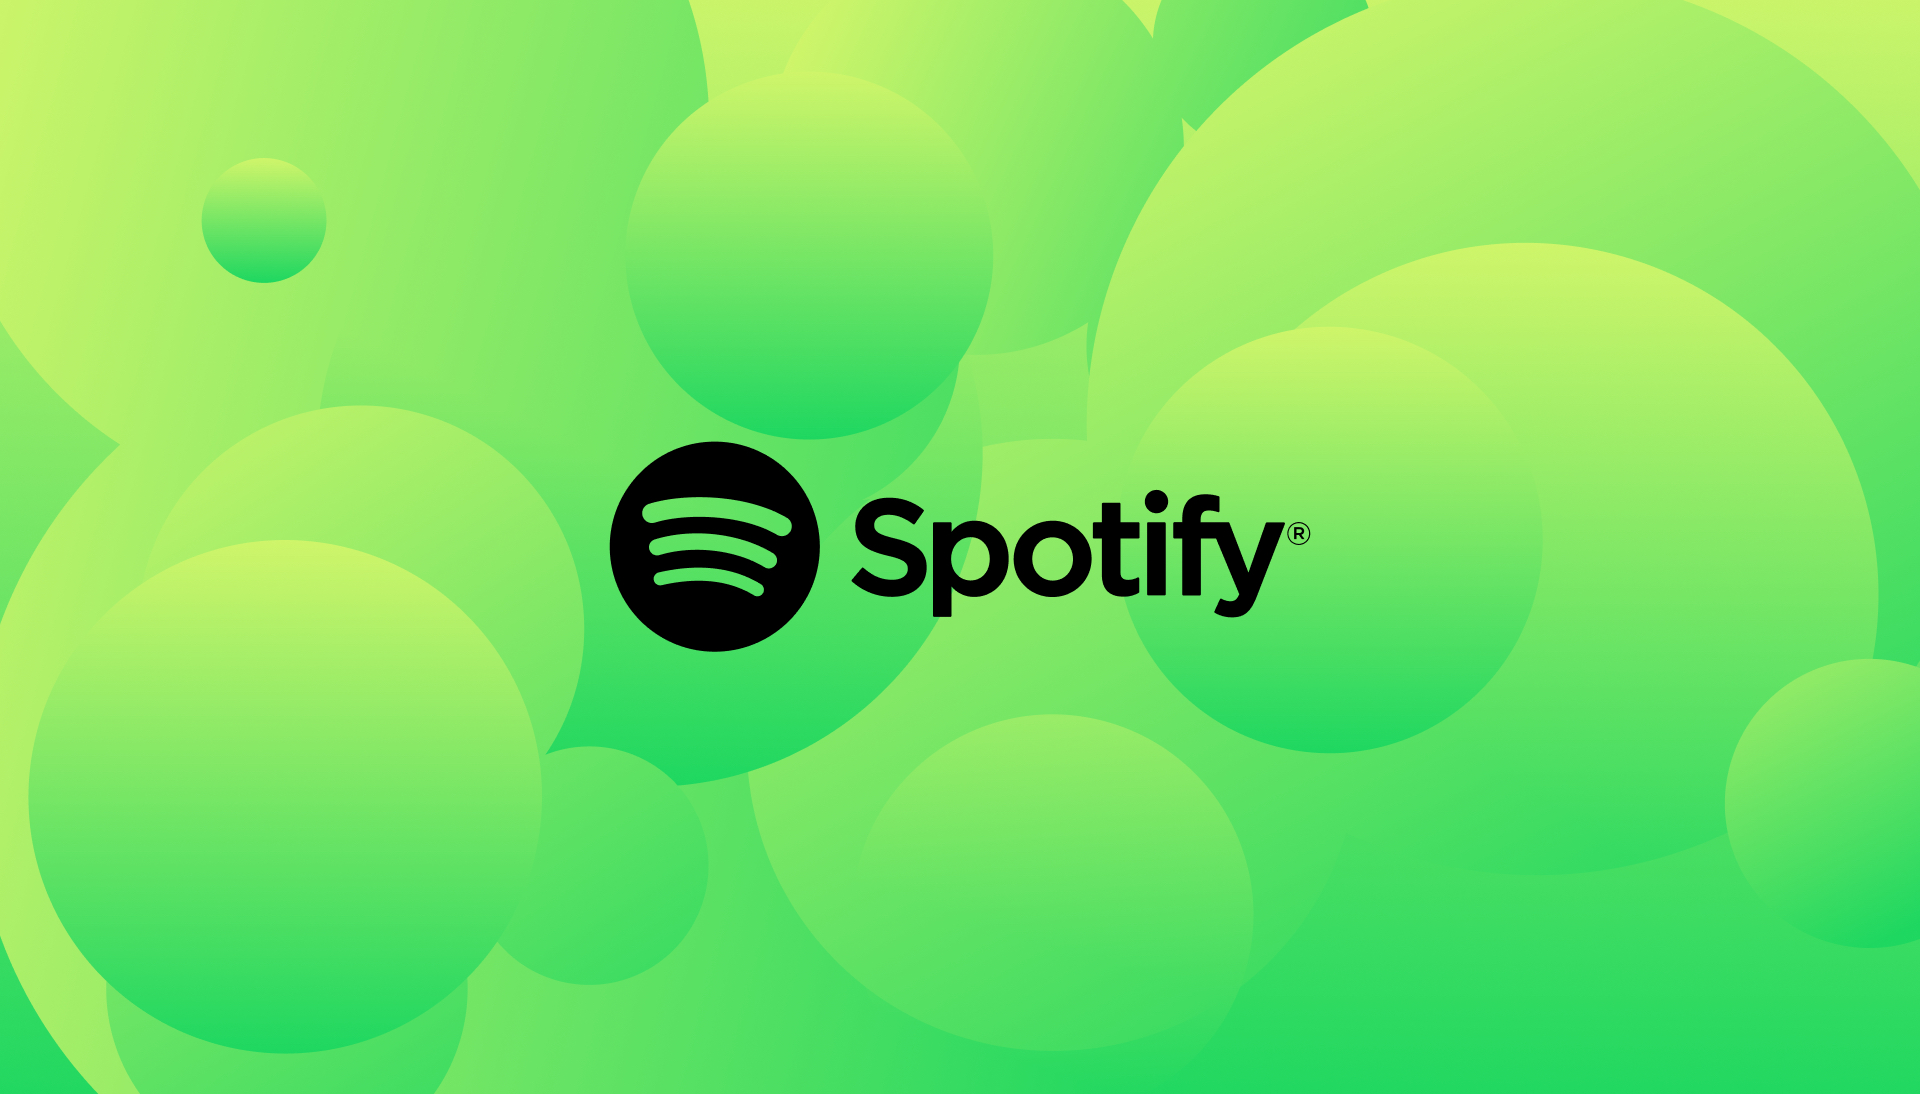

## Overview


**Objective**

The goal of this project is to identify the key audio and metadata features that influence a song’s popularity on Spotify, and to build models that can predict the popularity score of a track (on a scale from 0 to 100). This task has real-world applications in music marketing, playlist curation, and hit-song prediction.

**Value Proposition**

While platforms like Spotify provide billions of plays across millions of tracks, the determinants of a track’s popularity are not fully transparent. This project provides:

- Insight into **which musical characteristics** (e.g., energy, danceability, genre) most strongly influence popularity
- **Interpretability** for content creators and marketers to better understand what makes a track successful
- A **predictive framework** that approximates popularity using regression techniques

## Dataset


- **Source**: [Spotify Tracks Dataset via Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data)

The dataset contains 114,000+ songs with metadata and audio features extracted from Spotify’s Web API, including:

- **Track metadata:** Name, artist(s), album, genre, explicit content flag
- **Audio features:** Danceability, energy, loudness, valence, tempo, acousticness, speechiness, instrumentalness, and more
- **Target variable:** popularity (0–100), reflecting how frequently and recently the track has been played

# Part 2: Data Loading and Preprocessing


## 2.0 Import necessary libraries

In [89]:
!pip install pandasql

# Data Handling
import pandas as pd
import pandasql as psql
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Hypothesis Testing
from numpy.random import permutation

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=5ef7b34bf5564cfb147a905137dec84cff10f960c35d566e22c0bf0dec7d3a7e
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 Loading Data

In [90]:
#Load Data from Google Drive
df_original = pd.read_csv('/content/drive/Shareddrives/Big Data Final Project/Data_Spotify/dataset_Spotify.csv')

## 2.2 Inspecting Data

In [91]:
df_original.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

In [92]:
df_original.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [93]:
df_original.head(10)

Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
5                               Days I Will Remember   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   
8                We Sing. We Dance. We Steal Things.   
9                                             Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
5         0.688  0.4810  ...    -8.807     1       0.1050        0.2890   
6         0.407  0.1470  ...    -8.822     1       0.0355        0.8570   
7         0.703  0.4440  ...    -9.331     1       0.0417        0.5590   
8         0.625  0.4140  ...    -8.700     1       0.0369        0.2940   
9         0.442  0.6320  ...    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580   0.7150   87.917               4     acoustic  
1          0.000006    0.1010   0.2670   77.489               4     acoustic  
2          0.000000    0.1170   0.1200   76.332               4     acoustic  
3          0.000071    0.1320   0.1430  181.740               3     acoustic  
4          0.000000    0.0829   0.1670  119.949               4     acoustic  
5          0.000000    0.1890   0.6660   98.017               4     acoustic  
6          0.000003    0.0913   0.0765  141.284               3     acoustic  
7          0.000000    0.0973   0.7120  150.960               4     acoustic  
8          0.000000    0.1510   0.6690  130.088               4     acoustic  
9          0.004190    0.0735   0.1960   78.899               4     acoustic  

[10 rows x 21 columns]

## 2.3 Initial Cleaning




In this step, we implement these steps to ensure the dataset is clean for future analysis:

1. remove columns that are not useful for our analysis. These include:
`track_name`, `album_name`, `artists` ,`Unnamed: 0`.

2. any rows with missing values are dropped to make sure our data is clean and ready for modeling.

3. we remove rows with feature values that fall outside of predefined, acceptable numerical ranges. These thresholds are determined by documentation from the Spotify.

In [94]:
# Create a new df for inition cleaning
df_initial_cleaned = df_original.copy()

### 2.3.1 Drop Insignificant Columns and Null Rows

In [95]:
# Drop unnecessary columns by selecting only the useful ones
query_select_columns = """
SELECT
    track_id,
    popularity,
    duration_ms,
    explicit,
    danceability,
    energy,
    key,
    loudness,
    mode,
    speechiness,
    acousticness,
    instrumentalness,
    liveness,
    valence,
    tempo,
    time_signature,
    track_genre
FROM df_initial_cleaned
"""

# Apply column selection
df_initial_cleaned = psql.sqldf(query_select_columns, locals())

### 2.3.2 Drop Null Rows

In [97]:
# Drop null rows
query_drop_nulls = """
SELECT *
FROM df_initial_cleaned
WHERE
    track_id IS NOT NULL AND
    popularity IS NOT NULL AND
    duration_ms IS NOT NULL AND
    explicit IS NOT NULL AND
    danceability IS NOT NULL AND
    energy IS NOT NULL AND
    key IS NOT NULL AND
    loudness IS NOT NULL AND
    mode IS NOT NULL AND
    speechiness IS NOT NULL AND
    acousticness IS NOT NULL AND
    instrumentalness IS NOT NULL AND
    liveness IS NOT NULL AND
    valence IS NOT NULL AND
    tempo IS NOT NULL AND
    time_signature IS NOT NULL AND
    track_genre IS NOT NULL
"""

df_initial_cleaned = psql.sqldf(query_drop_nulls, locals())

### 2.3.3 Filtering Out-of-Range Values for Key Numerical Features


Inspected Features:
- `popularity`: [0-100],
- `danceability`:[0-1],
- `energy`:[0-1],
- `mode`:[0 or 1],
- `speechiness`:[0-1],
- `acousticness`:[0-1],
- `instumentalness`:[0-1],
- `liveness`:[0-1],
- `valence`:[0-1],
- `time_signature`:[3, 4, 5, 6, 7]

Modified Features:
- `time_signature`: 1136 rows were dropped

In [99]:
# Filter time_signature to be in range [3, 4, 5, 6, 7]
query_filter_time_signature = """
SELECT *
FROM df_initial_cleaned
WHERE time_signature IN (3, 4, 5, 6, 7)
"""

df_initial_cleaned = psql.sqldf(query_filter_time_signature, locals())

In [100]:
# Final check
print(f"Shape after cleaning: {df_initial_cleaned.shape}")
df_initial_cleaned.head()

Shape after cleaning: (112864, 17)


track_id  popularity  duration_ms  explicit  danceability  \
0  5SuOikwiRyPMVoIQDJUgSV          73       230666         0         0.676   
1  4qPNDBW1i3p13qLCt0Ki3A          55       149610         0         0.420   
2  1iJBSr7s7jYXzM8EGcbK5b          57       210826         0         0.438   
3  6lfxq3CG4xtTiEg7opyCyx          71       201933         0         0.266   
4  5vjLSffimiIP26QG5WcN2K          82       198853         0         0.618   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  0.4610    1    -6.746     0       0.1430        0.0322          0.000001   
1  0.1660    1   -17.235     1       0.0763        0.9240          0.000006   
2  0.3590    0    -9.734     1       0.0557        0.2100          0.000000   
3  0.0596    0   -18.515     1       0.0363        0.9050          0.000071   
4  0.4430    2    -9.681     1       0.0526        0.4690          0.000000   

   liveness  valence    tempo  time_signature track_genre  
0    0.3580    0.715   87.917               4    acoustic  
1    0.1010    0.267   77.489               4    acoustic  
2    0.1170    0.120   76.332               4    acoustic  
3    0.1320    0.143  181.740               3    acoustic  
4    0.0829    0.167  119.949               4    acoustic

# Part 3: Exploratory Data Analysis (EDA) - Numerical Scatter, Categorical Box

## 3.1 Target & Duration Overview

### 3.1.1 Popularity Score Distribution

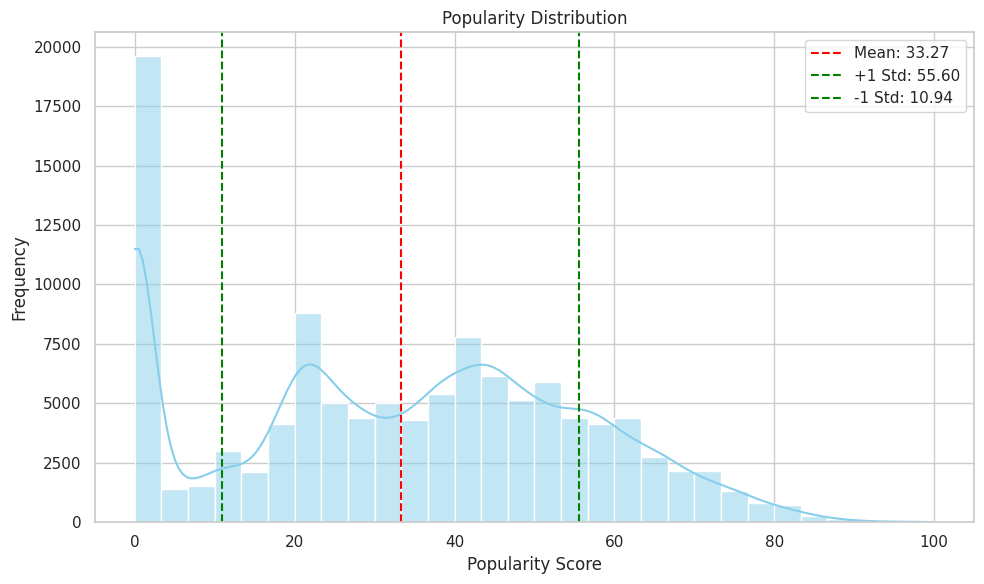

In [57]:
# Set plot style
sns.set(style="whitegrid")

# Calculate mean and std for popularity
pop_mean = df_initial_cleaned['popularity'].mean()
pop_std = df_initial_cleaned['popularity'].std()

# Create histogram with mean and std region
plt.figure(figsize=(10, 6))
sns.histplot(df_initial_cleaned['popularity'], bins=30, kde=True, color='skyblue')

# Plot mean line
plt.axvline(pop_mean, color='red', linestyle='--', label=f'Mean: {pop_mean:.2f}')
# Plot 1 std dev boundaries
plt.axvline(pop_mean + pop_std, color='green', linestyle='--', label=f'+1 Std: {pop_mean + pop_std:.2f}')
plt.axvline(pop_mean - pop_std, color='green', linestyle='--', label=f'-1 Std: {pop_mean - pop_std:.2f}')

plt.title('Popularity Distribution')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

The popularity score ranges from 0 to 100, with a **mean of ~33.27** and a **standard deviation of ~22.3**.  
The distribution is **right-skewed**, with a notable spike at `popularity = 0`, indicating many tracks that receive no significant plays.

This pattern suggests that while a large portion of songs on Spotify remain relatively obscure, there’s a long tail of more popular tracks.  
**This observation informs our modeling strategy**, as we may need to consider data imbalance or transformations (e.g., binning or trimming) in later steps.


### 3.1.2 Duration Distribution

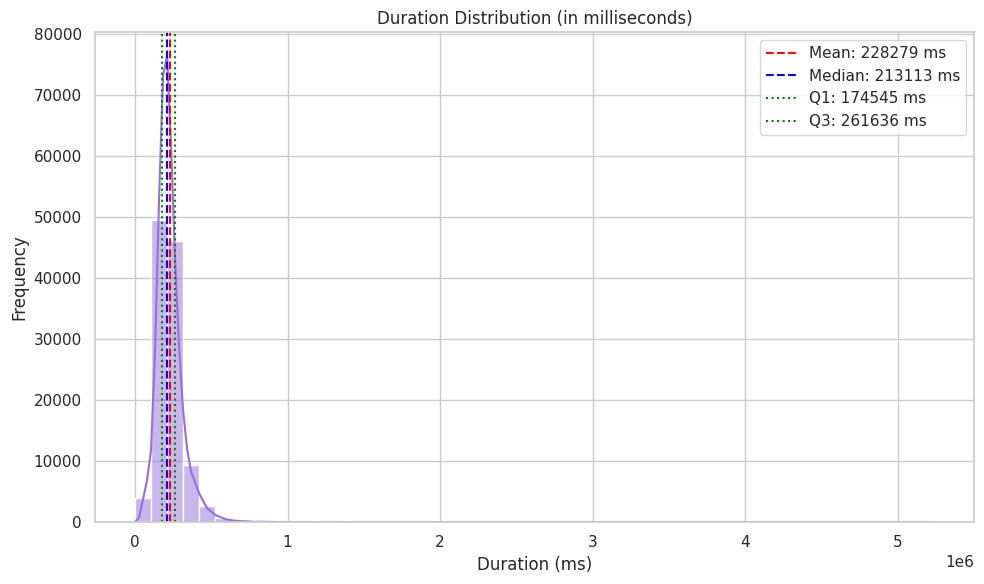

In [58]:
# Set style
sns.set(style="whitegrid")

# Calculate key stats for duration
dur_mean = df_initial_cleaned['duration_ms'].mean()
dur_median = df_initial_cleaned['duration_ms'].median()
q1 = df_initial_cleaned['duration_ms'].quantile(0.25)
q3 = df_initial_cleaned['duration_ms'].quantile(0.75)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_initial_cleaned['duration_ms'], bins=50, kde=True, color='mediumpurple')

# Mark mean, median, Q1, Q3
plt.axvline(dur_mean, color='red', linestyle='--', label=f'Mean: {dur_mean:.0f} ms')
plt.axvline(dur_median, color='blue', linestyle='--', label=f'Median: {dur_median:.0f} ms')
plt.axvline(q1, color='green', linestyle=':', label=f'Q1: {q1:.0f} ms')
plt.axvline(q3, color='green', linestyle=':', label=f'Q3: {q3:.0f} ms')

plt.title('Duration Distribution (in milliseconds)')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


The average track length in the dataset is **~ 228 seconds (~ 3.8 minutes)**, with a **median of ~213 seconds**.  
The distribution is **positively skewed**, with a long tail of extremely long tracks (e.g., >10 minutes), which may include podcasts, ambient tracks, or erroneous entries.

These outliers may distort regression results. In later steps, we plan to **trim tracks beyond the 99th percentile** or **apply log transformation** to normalize the feature.

## 3.2 Audio Features vs Popularity (Numerical)

In this section, we examine how key numerical audio features relate to a track’s popularity score.  
We use **Pearson correlation coefficient** and **scatter plots with trendlines** to evaluate the **strength and direction** of linear relationships.

The analyzed audio features include:

- `danceability`: how suitable a track is for dancing based on tempo, rhythm stability, and beat strength
- `energy`: the intensity and activity of the track
- `loudness`: overall loudness in decibels (dB)
- `speechiness`: the presence of spoken words
- `acousticness`: the degree of acoustic sound
- `instrumentalness`: confidence that the track contains no vocals
- `liveness`: presence of an audience
- `valence`: musical positivity conveyed by the track

This step not only helps **identify features with predictive potential**, but also informs feature transformation and selection in later stages.

### 3.2.1 Faceted scatterplots: `danceability`, `energy`, `loudness`, `speechniess`, `acousiticness`, 'instrumentalness', 'liveness', 'valence'

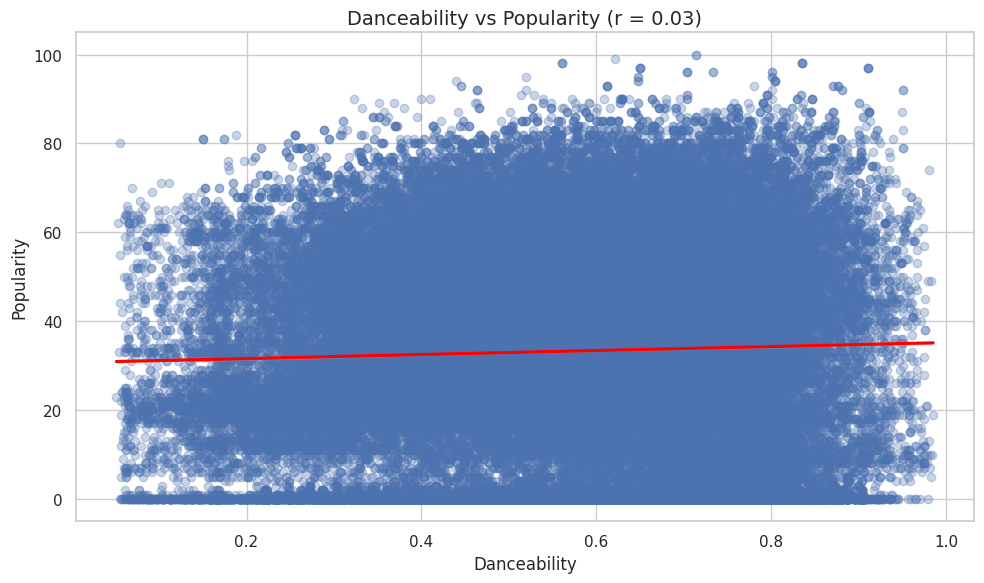

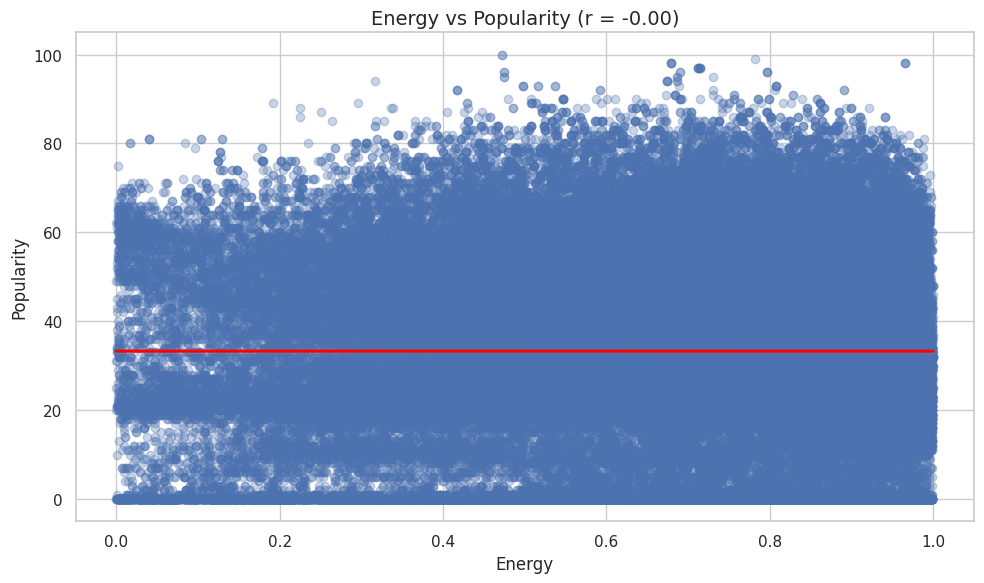

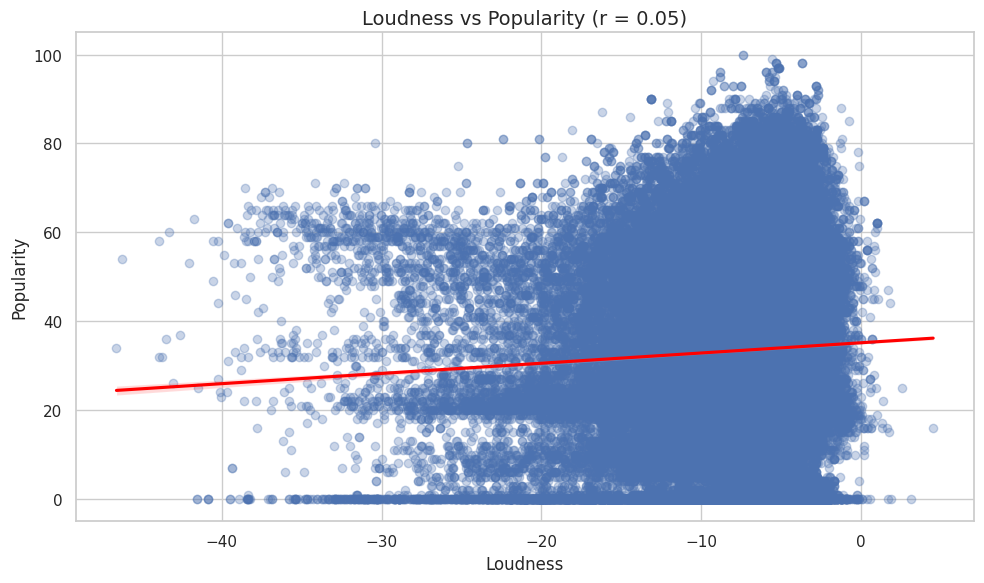

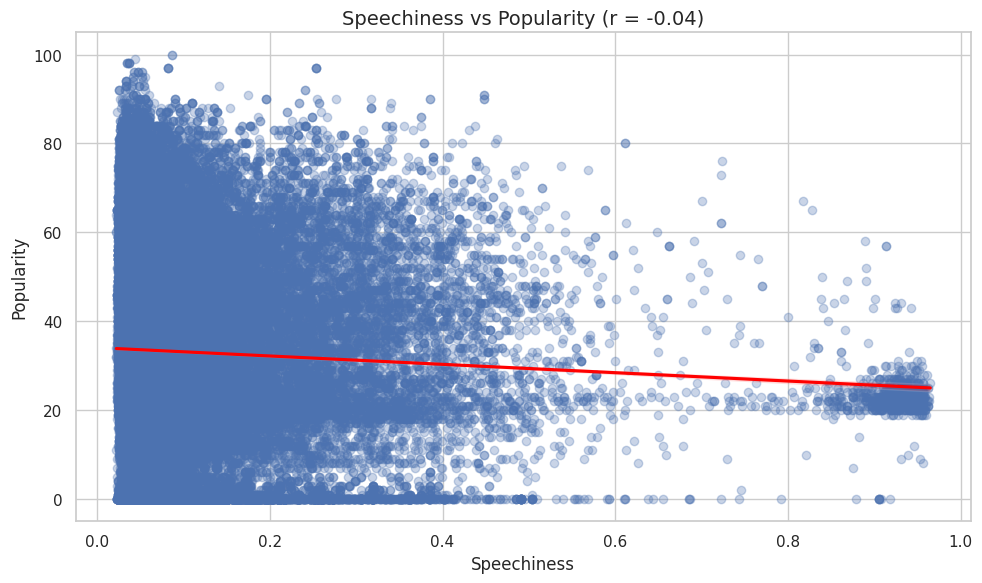

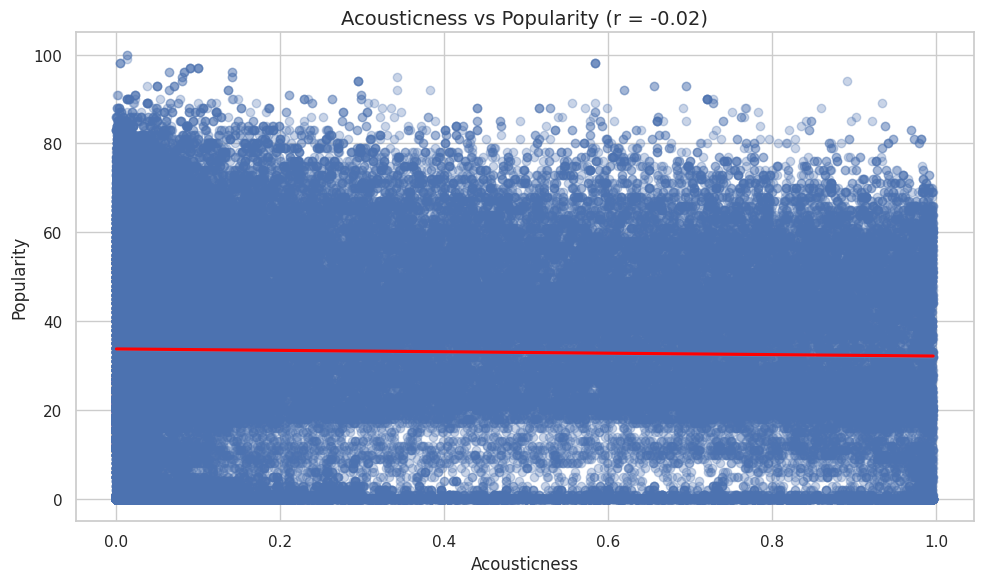

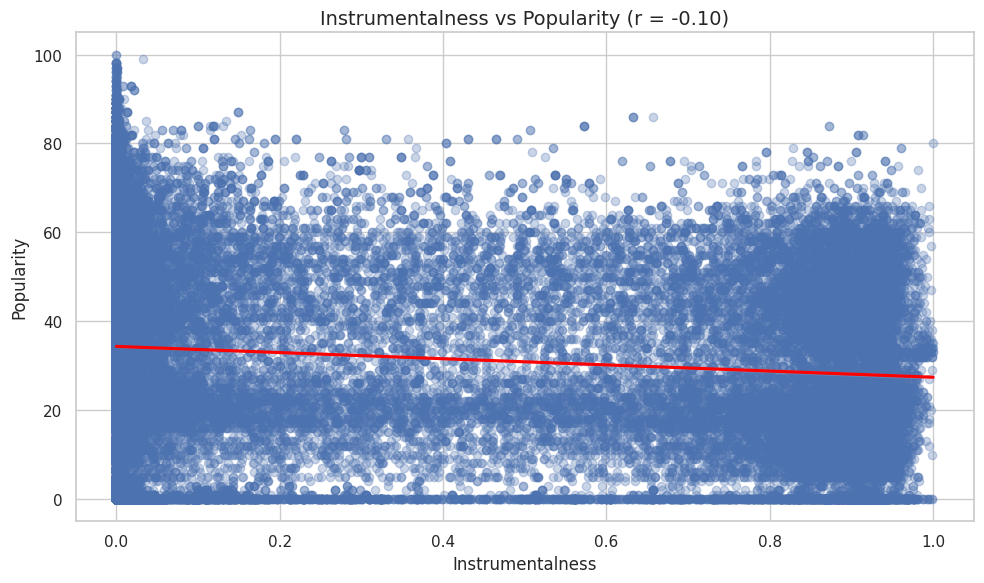

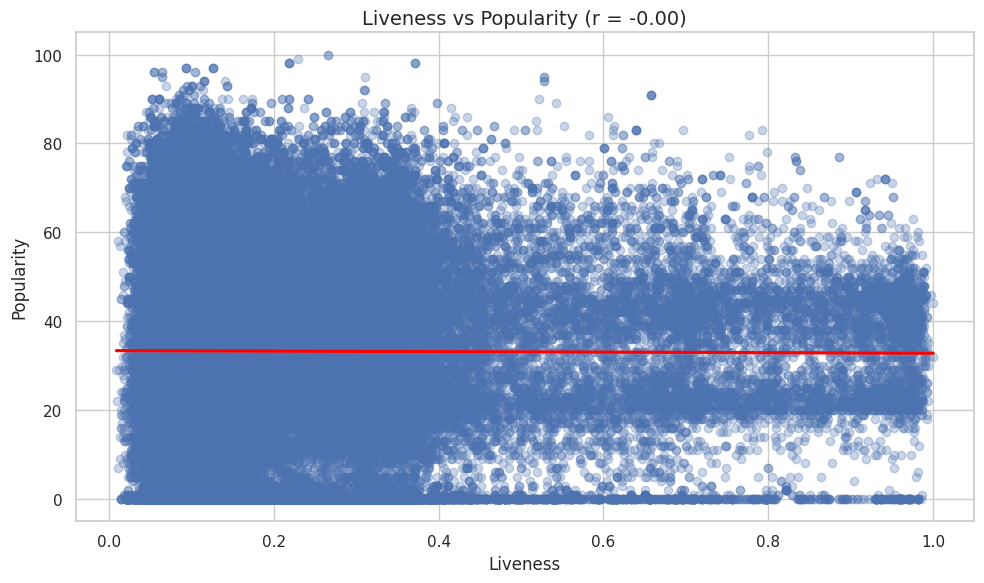

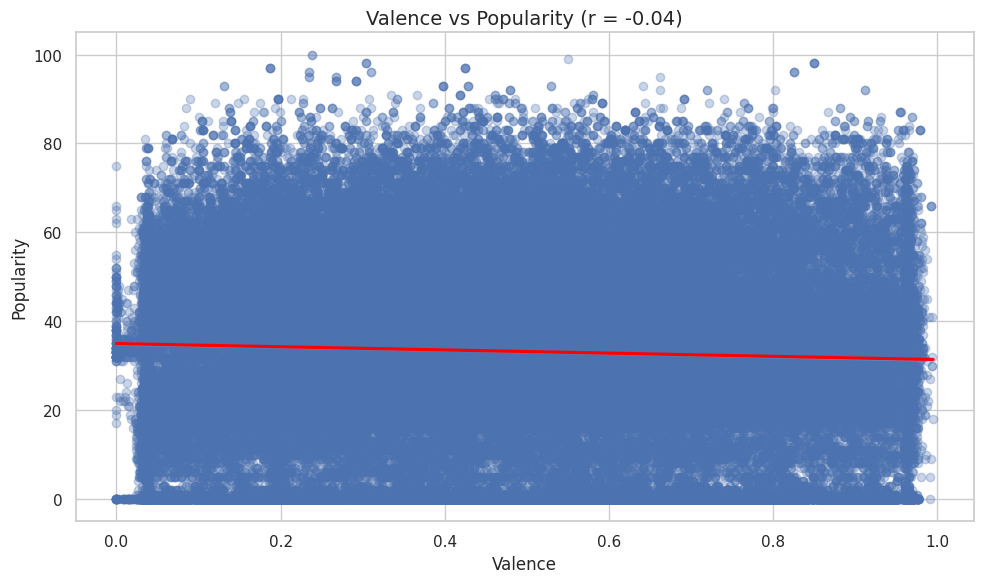

In [59]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent visual style across all plots
sns.set(style="whitegrid")

# Define the list of audio features to analyze
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence'
]

# Loop through each feature and generate scatter plots with correlation coefficient
for feature in audio_features:
    # Calculate Pearson correlation between the feature and popularity
    corr, _ = pearsonr(df_initial_cleaned[feature], df_initial_cleaned['popularity'])

    # Initialize a new figure for each plot
    plt.figure(figsize=(10, 6))

    # Create scatter plot with regression line (trendline in red)
    sns.regplot(
        x=feature,
        y='popularity',
        data=df_initial_cleaned,
        scatter_kws={'alpha': 0.3},        # set transparency for better readability
        line_kws={'color': 'red'}          # red trendline to highlight correlation
    )

    # Set plot title including the Pearson correlation coefficient
    plt.title(f'{feature.capitalize()} vs Popularity (r = {corr:.2f})', fontsize=14)

    # Axis labels
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Popularity', fontsize=12)

    # Ensure the layout does not overlap
    plt.tight_layout()

    # Display the plot
    plt.show()

### 3.2.2 Summary of patterns

Most audio features showed **very weak linear correlation** with popularity. The Pearson `r` values ranged from -0.10 to +0.05:

- **Danceability (r = 0.03)** and **Energy (r ≈ 0.00)** exhibit almost no correlation with popularity, contrary to common intuition that upbeat tracks are more popular.
- **Loudness (r = 0.05)** shows a slight positive trend, suggesting louder tracks may be marginally more popular, though the relationship is weak.
- **Speechiness (r = -0.04)** and **Valence (r = -0.04)** are weakly negatively correlated, indicating that speech-heavy or extremely happy-sounding tracks may not consistently perform better.
- **Acousticness (r = -0.02)** and **Liveness (r ≈ 0.00)** do not display meaningful trends.
- **Instrumentalness (r = -0.10)** has the strongest negative correlation observed, implying that tracks without vocals tend to be less popular.

These findings suggest that **audio-based features alone may not strongly predict popularity** in a linear fashion.  
They highlight the potential need to:
- Incorporate **categorical metadata** (e.g., genre, explicit flag)
- Explore **nonlinear models** or **feature interactions**
- Apply **transformations** to skewed distributions (e.g., log-scaling instrumentalness)

Ultimately, while no single audio feature dominates popularity prediction, combinations of subtle factors may still drive patterns in listener behavior.

## 3.3 Categorical Features vs Popularity


### 3.3.1 Explicit / Mode / Track Genre

In this section, we analyze how several categorical attributes—**explicit content**, **musical mode**, and **track genre**—are associated with song popularity.

These variables represent key metadata elements that are often more interpretable to artists, producers, and marketers than abstract audio signals.  
We visualize the relationship between category membership and popularity using **box plots**, which highlight median trends and variability.

The features include:

- **Explicit**: whether the track contains explicit content (`0 = non-explicit`, `1 = explicit`)
- **Mode**: the modality of the track (`0 = minor`, `1 = major`)
- **Track Genre**: grouped into 20+ genre clusters for clarity, based on domain knowledge and Spotify taxonomy

This step supports both the **interpretability goal** and the **feature selection process** of our project.

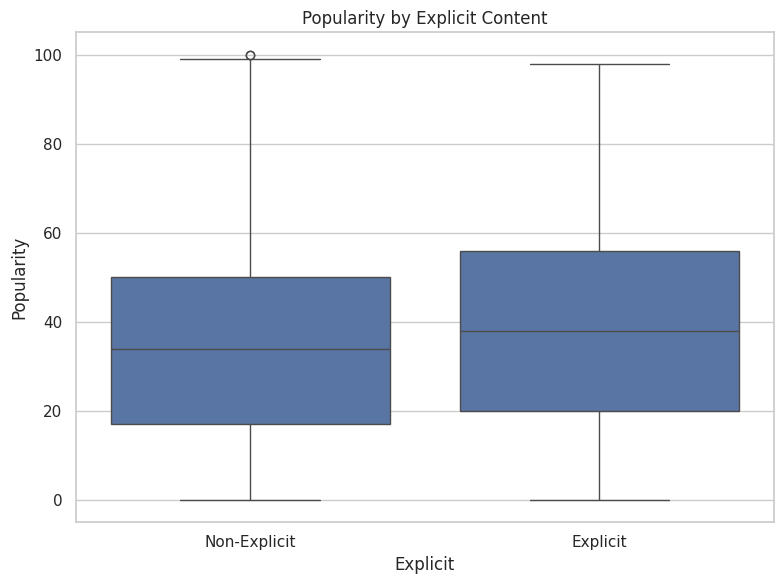

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set consistent plot style
sns.set(style="whitegrid")

### Plot 1: Popularity by Explicit Content
plt.figure(figsize=(8, 6))
sns.boxplot(x='explicit', y='popularity', data=df_initial_cleaned)
plt.title('Popularity by Explicit Content')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])  # human-readable labels
plt.tight_layout()
plt.show()


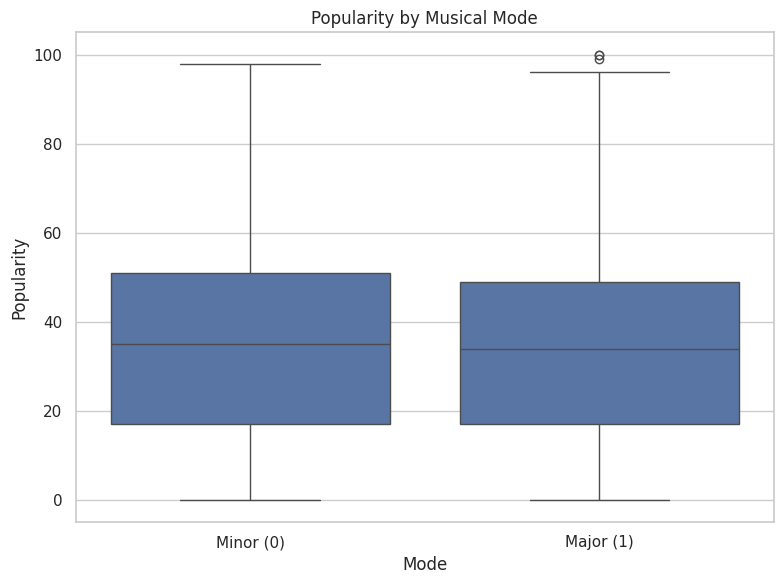

In [61]:
### Plot 2: Popularity by Musical Mode
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='popularity', data=df_initial_cleaned)
plt.title('Popularity by Musical Mode')
plt.xlabel('Mode')
plt.ylabel('Popularity')
plt.xticks([0, 1], ['Minor (0)', 'Major (1)'])
plt.tight_layout()
plt.show()

In [62]:
# Define Genre Grouping Mapping

genre_mapping = {
    # Rock/Metal
    'alt-rock': 'Rock/Metal', 'rock': 'Rock/Metal', 'rock-n-roll': 'Rock/Metal',
    'hard-rock': 'Rock/Metal', 'punk': 'Rock/Metal', 'punk-rock': 'Rock/Metal',
    'emo': 'Rock/Metal', 'grunge': 'Rock/Metal', 'metal': 'Rock/Metal',
    'metalcore': 'Rock/Metal', 'hardcore': 'Rock/Metal', 'heavy-metal': 'Rock/Metal',
    'black-metal': 'Rock/Metal', 'death-metal': 'Rock/Metal',
    'psych-rock': 'Rock/Metal', 'rockabilly': 'Rock/Metal',
    'goth': 'Rock/Metal', 'grindcore': 'Rock/Metal',

    # Electronic
    'edm': 'Electronic', 'electronic': 'Electronic', 'electro': 'Electronic',
    'house': 'Electronic', 'deep-house': 'Electronic', 'progressive-house': 'Electronic',
    'techno': 'Electronic', 'trance': 'Electronic', 'dubstep': 'Electronic',
    'minimal-techno': 'Electronic', 'detroit-techno': 'Electronic',
    'drum-and-bass': 'Electronic', 'club': 'Electronic', 'chicago-house': 'Electronic',
    'garage': 'Electronic', 'idm': 'Electronic', 'industrial': 'Electronic',
    'breakbeat': 'Electronic', 'dance': 'Electronic', 'disco': 'Electronic',
    'trip-hop': 'Electronic',

    # Pop
    'pop': 'Pop', 'synth-pop': 'Pop', 'j-pop': 'Pop', 'k-pop': 'Pop',
    'power-pop': 'Pop', 'indie-pop': 'Pop', 'pop-film': 'Pop',
    'british': 'Pop', 'cantopop': 'Pop', 'mandopop': 'Pop',

    # Hip-Hop
    'hip-hop': 'Hip-Hop',

    # R&B / Soul
    'r-n-b': 'R&B/Soul', 'soul': 'R&B/Soul', 'funk': 'R&B/Soul', 'groove': 'R&B/Soul',

    # Jazz / Blues
    'jazz': 'Jazz/Blues', 'blues': 'Jazz/Blues',

    # Classical
    'classical': 'Classical', 'opera': 'Classical', 'piano': 'Classical', 'new-age': 'Classical',

    # Country / Folk
    'country': 'Country/Folk', 'honky-tonk': 'Country/Folk', 'bluegrass': 'Country/Folk', 'folk': 'Country/Folk',

    # Latin
    'latin': 'Latin', 'latino': 'Latin', 'reggaeton': 'Latin', 'brazil': 'Latin',
    'forro': 'Latin', 'samba': 'Latin', 'salsa': 'Latin', 'mpb': 'Latin',
    'pagode': 'Latin', 'sertanejo': 'Latin', 'tango': 'Latin',

    # Reggae / Dub
    'reggae': 'Reggae/Dub', 'dancehall': 'Reggae/Dub', 'dub': 'Reggae/Dub', 'ska': 'Reggae/Dub',

    # Indie / Alternative
    'indie': 'Indie/Alternative', 'songwriter': 'Indie/Alternative', 'singer-songwriter': 'Indie/Alternative',
    'alternative': 'Indie/Alternative', 'guitar': 'Indie/Alternative',

    # Ambient / Chill
    'ambient': 'Ambient/Chill', 'sleep': 'Ambient/Chill', 'chill': 'Ambient/Chill', 'study': 'Ambient/Chill',

    # Religious
    'gospel': 'Religious',

    # World
    'world-music': 'World', 'indian': 'World', 'iranian': 'World', 'turkish': 'World',
    'malay': 'World', 'french': 'World', 'german': 'World', 'swedish': 'World',
    'spanish': 'World', 'afrobeat': 'World',

    # Children
    'children': 'Children', 'disney': 'Children', 'kids': 'Children',

    # Japanese
    'anime': 'Japanese', 'j-dance': 'Japanese', 'j-idol': 'Japanese', 'j-rock': 'Japanese',

    # Comedy
    'comedy': 'Comedy',

    # Mood / Theme
    'romance': 'Mood/Theme', 'sad': 'Mood/Theme', 'happy': 'Mood/Theme',
    'party': 'Mood/Theme', 'show-tunes': 'Mood/Theme',

    # Other
    'acoustic': 'Other'
}

<ipython-input-63-339afc3296ab>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


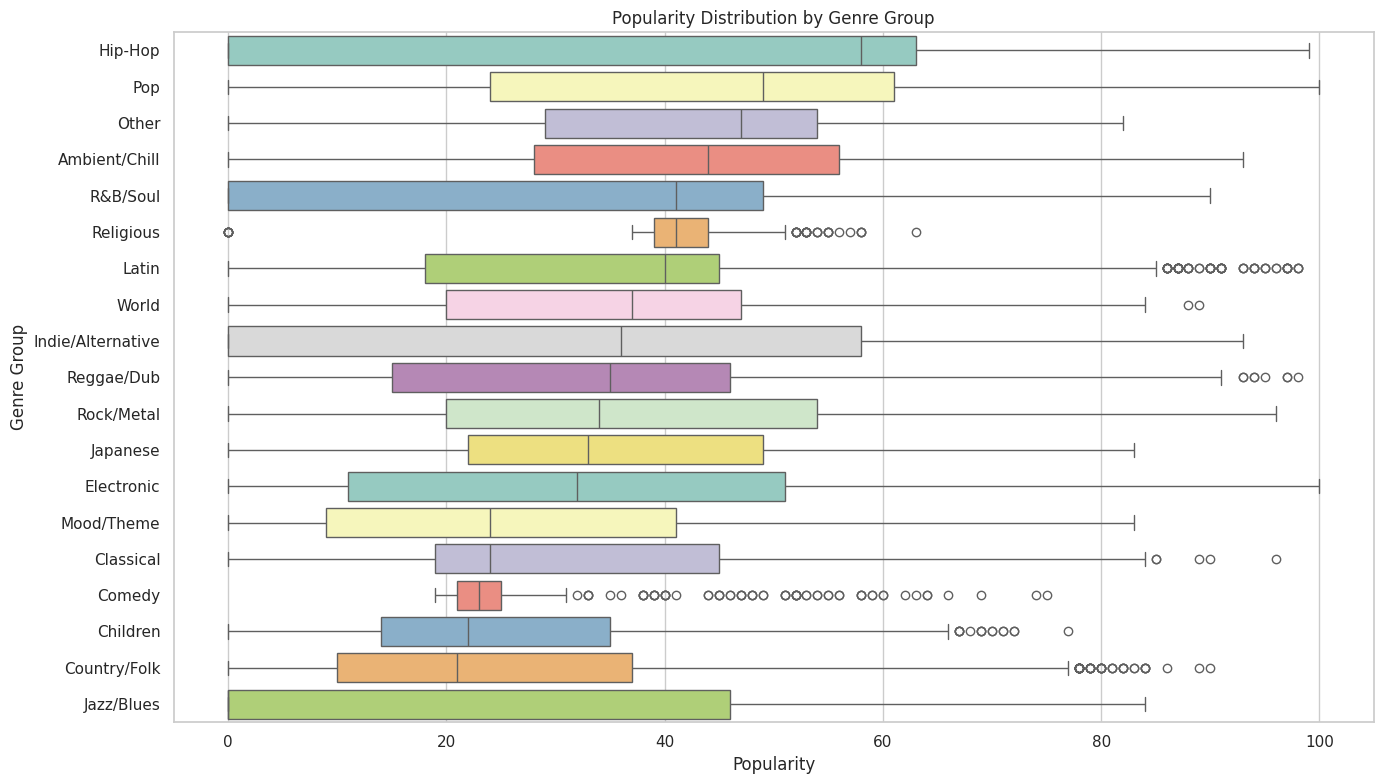

In [63]:
### Plot 3: Popularity by Genre Grouping

# Genre mapping already defined — applied below:
df_grouped = df_initial_cleaned.copy()
df_grouped['genre_grouped'] = df_grouped['track_genre'].map(genre_mapping)

# Drop rows with unmapped genres
df_grouped = df_grouped.dropna(subset=['genre_grouped'])

# Sort genre categories by median popularity for better y-axis ordering
genre_order = df_grouped.groupby('genre_grouped')['popularity'].median().sort_values(ascending=False).index

# Create horizontally-oriented boxplot of popularity across genre groups
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_grouped,
    x='popularity',
    y='genre_grouped',
    order=genre_order,
    palette='Set3'  # pastel, color-safe palette
)

plt.title('Popularity Distribution by Genre Group')
plt.xlabel('Popularity')
plt.ylabel('Genre Group')
plt.tight_layout()
plt.show()

**Explicit Content**  
Tracks labeled as explicit tend to have slightly higher median popularity than non-explicit tracks.  
This could reflect a broader trend in pop and hip-hop genres, where explicit content is more common and mainstream.  

*Implication:* The `explicit` feature may serve as a weak signal of mainstream appeal and should be retained for modeling (likely as a binary feature).




**Musical Mode**  
There is no meaningful difference in popularity between tracks in **minor (0)** and **major (1)** mode.  
The medians and IQRs are nearly identical, and the spread suggests that mode is not a strong determinant of success.  

*Implication:* This feature may not contribute predictive power and could be tested in feature selection.



**Genre Group**  
Clear patterns emerge when popularity is broken down by genre:
- **Hip-Hop, Pop, and R&B/Soul** lead in median popularity and show consistently higher upper quartiles
- **Jazz/Blues, Classical, and Comedy** tracks tend to have lower popularity, with tight IQRs and low outliers
- Genre groups such as **Ambient/Chill** and **Indie/Alternative** show wider variance, possibly indicating niche yet occasionally viral content

*Implication:* `genre_grouped` is a highly informative feature with potential nonlinear influence and should be preserved.  
It can be encoded as one-hot or target-mean depending on the model used.

### 3.3.2 Other Metadata (tempo marking, key, time signature)

In this section, we explore less commonly discussed—but musically fundamental—categorical features and their relationship with popularity:

- **Tempo**: The pace of the track, converted to **traditional tempo markings** (e.g., Andante, Allegro)
- **Key**: The musical key of the track (0 = C, 1 = C#/Db, ..., 11 = B)
- **Time Signature**: The number of beats per bar (e.g., 4/4, 3/4)

We use **boxplots** and **barplots** to examine whether any of these musical attributes show consistent trends with track popularity.

While tempo is originally a numeric variable (measured in beats per minute), raw BPM values can be noisy and difficult to interpret.  
To enhance **interpretability and generalizability**, we convert BPM into standard classical tempo ranges using musicological thresholds:  
(*See [Wikipedia - Tempo Markings](https://en.wikipedia.org/wiki/Tempo#Basic_tempo_markings) for reference.*)

In [64]:
# Function to map tempo (in BPM) to classical tempo markings
def tempo_to_marking(bpm):
    if bpm < 40:
        return "Grave"
    elif bpm < 60:
        return "Largo"
    elif bpm < 76:
        return "Adagio"
    elif bpm < 108:
        return "Andante"
    elif bpm < 120:
        return "Moderato"
    elif bpm < 168:
        return "Allegro"
    else:
        return "Presto"

<ipython-input-65-6e7e68311f0a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='tempo_marking', y='mean', palette='viridis')


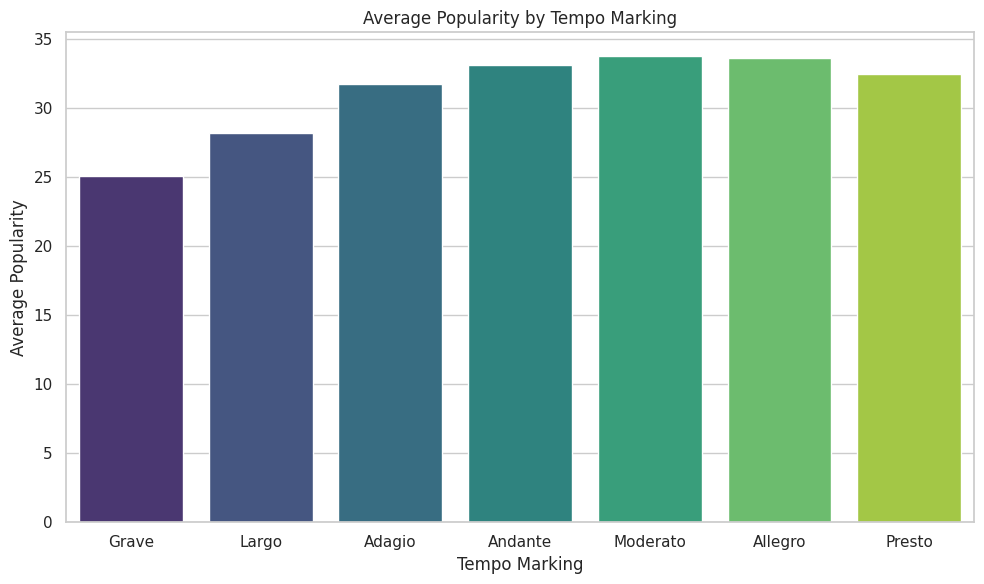

In [65]:
### Plot 1: Popularity by tempo_marking

# Create new column for tempo marking
df_initial_cleaned['tempo_marking'] = df_initial_cleaned['tempo'].apply(tempo_to_marking)
df_initial_cleaned.drop(columns=['tempo'], inplace=True)

# Group by tempo_marking and calculate mean and std of popularity
df_grouped = df_initial_cleaned.groupby('tempo_marking')['popularity'].agg(['mean', 'count']).reset_index()

# Sort tempo_markings in traditional musical order
tempo_order = ["Grave", "Largo", "Adagio", "Andante", "Moderato", "Allegro", "Presto"]
df_grouped['tempo_marking'] = pd.Categorical(df_grouped['tempo_marking'], categories=tempo_order, ordered=True)
df_grouped.sort_values('tempo_marking', inplace=True)

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='tempo_marking', y='mean', palette='viridis')

plt.title('Average Popularity by Tempo Marking')
plt.xlabel('Tempo Marking')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

<ipython-input-66-bb3c6b6d8242>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='key', y='popularity', data=df_initial_cleaned, palette='tab20')


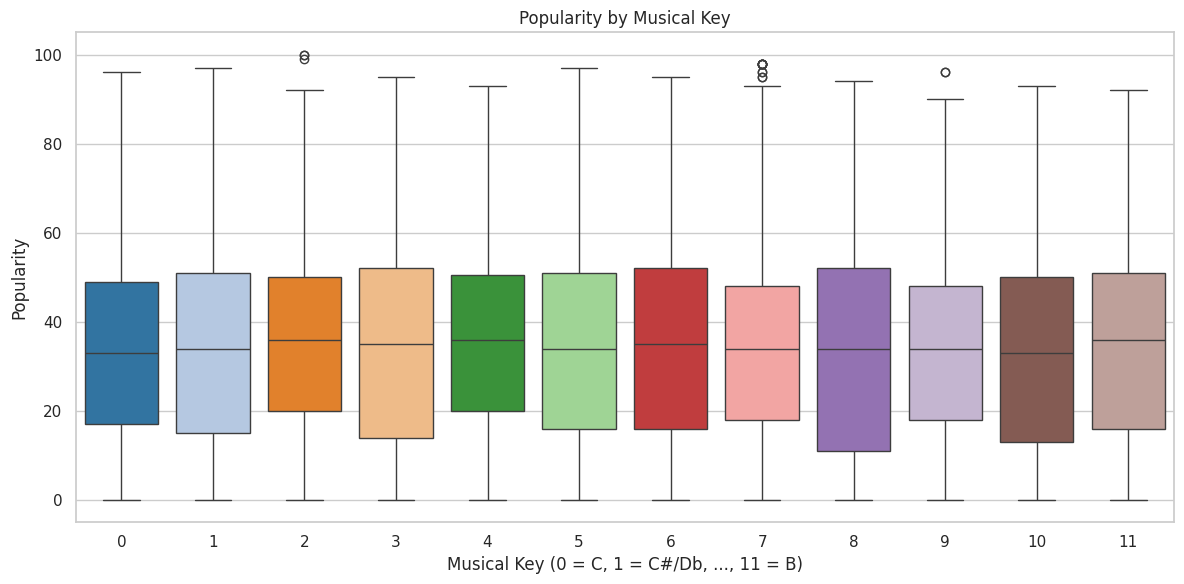

In [66]:
### Plot 2: Popularity by musical keys (0-11)
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='popularity', data=df_initial_cleaned, palette='tab20')

plt.title('Popularity by Musical Key')
plt.xlabel('Musical Key (0 = C, 1 = C#/Db, ..., 11 = B)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

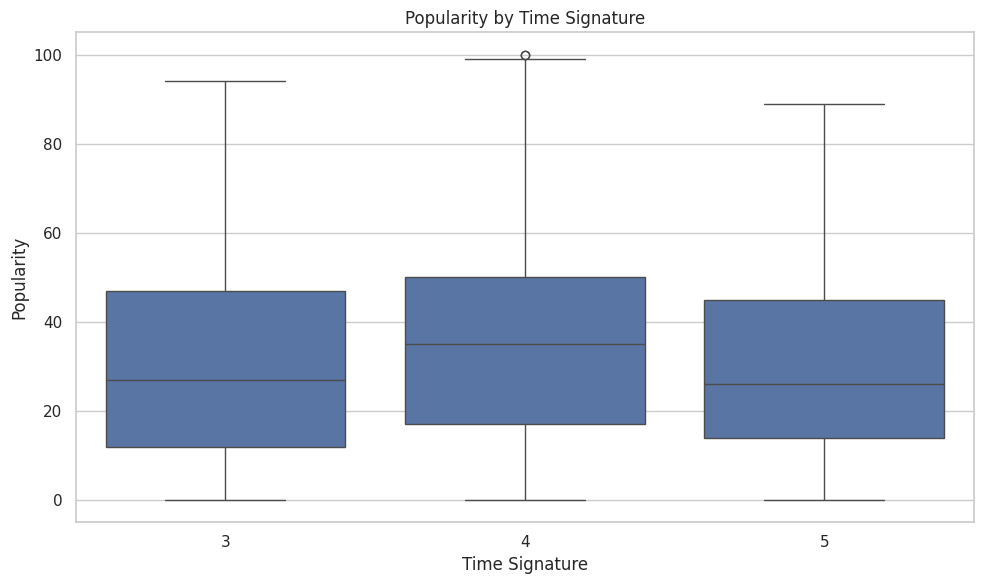

In [67]:
### Plot 3: Popularity bytime_signature
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_signature', y='popularity', data=df_initial_cleaned)

plt.title('Popularity by Time Signature')
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

**Tempo Marking**  
We observe a **clear upward trend in average popularity** as tempo increases from slow (Grave) to moderate-fast (Moderato/Allegro), peaking around Allegro.  
Interestingly, popularity slightly drops again for the fastest category, Presto, possibly due to genre-specific constraints (e.g., ultra-fast tempos appearing in niche EDM or classical subtypes).  

 *Implication:* The tempo marking feature shows a meaningful pattern and captures intuitive musical pacing in a human-interpretable form.  
It should be retained as a **categorical feature** with potential predictive value—especially if genre is also considered.

**Musical Key**  
There is **no noticeable difference in popularity** across musical keys (0–11).  
The medians and interquartile ranges are nearly identical, and the wide internal variance suggests randomness rather than structured influence.

 *Implication:* Musical key does not appear to impact popularity and may be dropped in later feature selection unless interaction effects with genre or mode are explored.

**Time Signature**  
Among available time signatures (3, 4, 5), **tracks in 4/4** (the most common in pop and modern genres) have a slightly higher median popularity.  
However, the variance within each category is substantial, and **overall differences are weak**.

 *Implication:* While music theory supports 4/4 as the most listener-accessible signature, it doesn’t distinguish strongly in this dataset.  
This feature is likely low-priority in future model training.

## 3.4 Correlation Analysis


### 3.4.1 Pearson Heatmap (numerical only)

To better understand how numerical audio and metadata features relate to one another, we construct a **Pearson correlation heatmap**.

We limit this analysis to **truly numerical features** (continuous or ratio-scaled), excluding:

- `mode`, `key`, and `time_signature` — these are **categorical or ordinal**
- `tempo` — already transformed into `tempo_marking` for interpretability

The correlation matrix helps:
- Identify **redundant features**
- Detect **spurious or colinear variables** that may affect linear model stability
- Guide **feature selection and dimensionality reduction** in modeling

In [68]:
df_initial_cleaned.columns.tolist()

['track_id',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'time_signature',
 'track_genre',
 'tempo_marking']

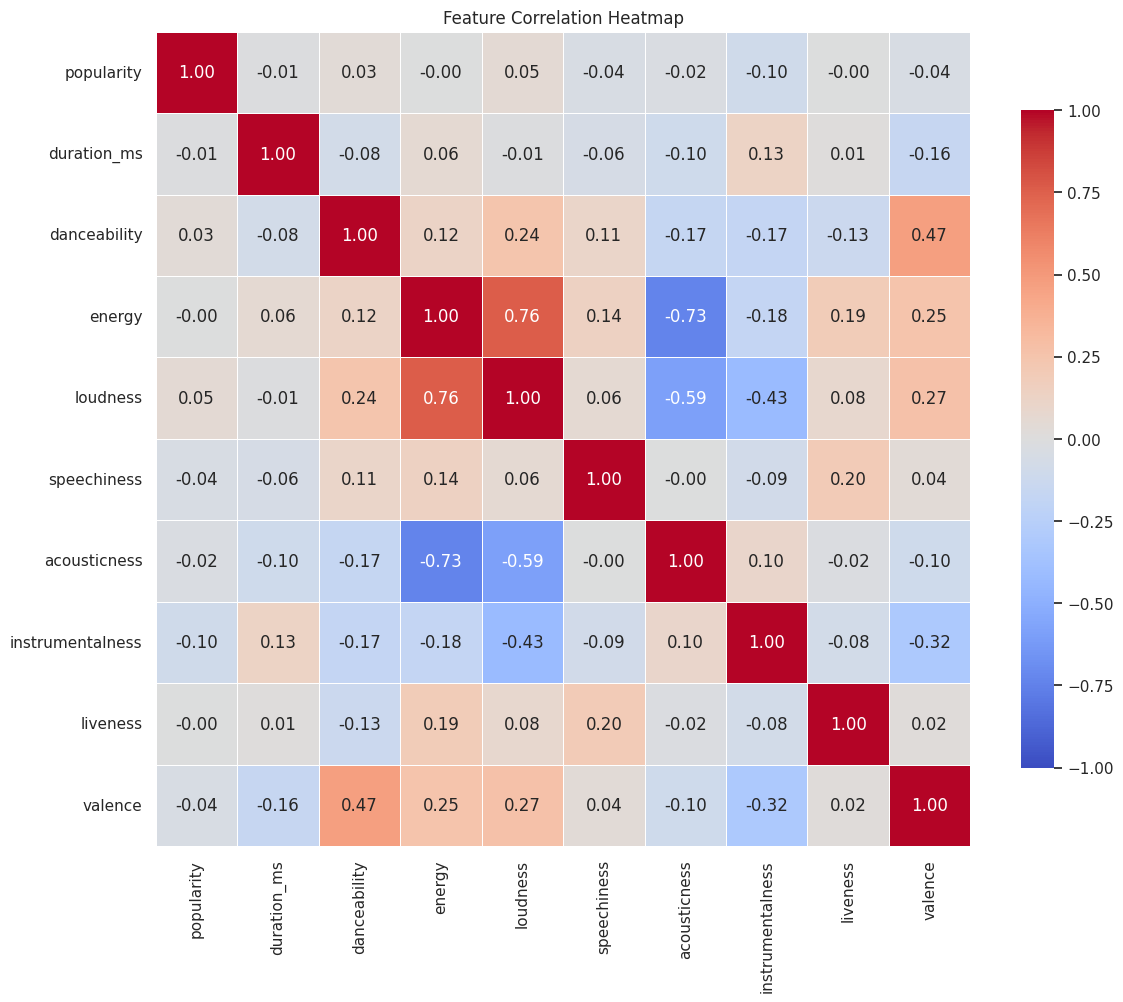

In [69]:
# Select only numerical features for correlation analysis
numerical_cols = df_initial_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('time_signature')  # ordinal categorical
numerical_cols.remove('key')             # categorical (musical key)
numerical_cols.remove('mode')            # binary, treat separately

# Compute correlation matrix
corr_matrix = df_initial_cleaned[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


The heatmap reveals several **noteworthy correlation patterns** among numerical audio features:

**Strong Feature Correlations** (|r| > 0.7)：
- `energy` and `loudness` (r = **0.76**)
- `energy` and `acousticness` (r = **-0.73**)
- `loudness` and `acousticness` (r = **-0.59**)

**Moderate Correlations**:
- `valence` and `danceability` (r = **0.47**)
- `instrumentalness` and `loudness` (r = **-0.43**)

**Weak or No Correlation with Popularity**:
- No feature shows strong linear correlation with `popularity`. The highest is `loudness` (r ≈ 0.05) and most values hover near zero.


**Implications**:
- **Multicollinearity warning**: The high correlation between `energy`, `loudness`, and `acousticness` means they may introduce redundancy in linear models. Consider:
  - Dropping one of the redundant features
  - Using **PCA** or **regularization (Lasso/Ridge)** to mitigate this
- **Weak signals for linear models**: Since no single feature correlates strongly with `popularity`, it's likely that:
  - Nonlinear models (e.g., tree ensembles, neural nets) will perform better
  - Feature interactions and higher-order terms may be more informative

This correlation map serves as a valuable diagnostic tool for the next stage—**feature selection and modeling design**.


### 3.4.2 Spearman Correlation (categorical encoded)

To better understand how **categorical or ordinal variables** relate to `popularity`, we use **Spearman rank-order correlation**.

This method evaluates **monotonic relationships**, which is more appropriate than Pearson correlation for:
- Ordinal features like `mode`, `key`, or `time_signature`
- Categorical variables mapped to ordered numeric labels (`tempo_marking`)

We encode `tempo_marking` into classical tempo order:
`Grave < Largo < Adagio < Andante < Moderato < Allegro < Presto`

This approach allows us to detect **nonlinear but directionally consistent trends**, complementing the Pearson analysis above.


In [70]:
from scipy.stats import spearmanr

# Define categorical variables to test against popularity
categorical_vars = ['explicit', 'mode', 'key', 'time_signature', 'tempo_marking']

# Prepare dictionary to store correlation results
spearman_results = {}

# Convert categorical string to numeric if needed
df_corr = df_initial_cleaned.copy()

# Tempo marking must be ordinal-encoded before correlation
tempo_order = ["Grave", "Largo", "Adagio", "Andante", "Moderato", "Allegro", "Presto"]
tempo_mapping = {marking: idx for idx, marking in enumerate(tempo_order)}
df_corr['tempo_marking_encoded'] = df_corr['tempo_marking'].map(tempo_mapping)

# Spearman correlation loop
for var in categorical_vars:
    if var == 'tempo_marking':
        corr, _ = spearmanr(df_corr['tempo_marking_encoded'], df_corr['popularity'])
    else:
        corr, _ = spearmanr(df_corr[var], df_corr['popularity'])

    spearman_results[var] = corr

# Convert to DataFrame for easy viewing
df_spearman = pd.DataFrame.from_dict(spearman_results, orient='index', columns=['Spearman Correlation'])
df_spearman = df_spearman.sort_values(by='Spearman Correlation', ascending=False)

# Display
print(df_spearman)

                Spearman Correlation
explicit                    0.041005
time_signature              0.033765
tempo_marking               0.006850
key                        -0.003215
mode                       -0.014714


**Implications**:

- No categorical variable exhibits a strong monotonic correlation with popularity on its own.
- `explicit` and `time_signature` show marginal positive trends, while `mode` and `key` appear unrelated.
- These features may still be useful in **interaction terms**, **tree-based models**, or **categorical encoding schemes** even if their individual rank correlation is weak.

This analysis reinforces the idea that **popularity is influenced by complex interactions**, rather than single categorical drivers.

## 3.5 Summary of EDA Insights

Our exploratory analysis of numerical and categorical features reveals the following key takeaways:

**No single feature strongly predicts popularity** in a linear or monotonic fashion.  
- Most Pearson and Spearman correlations with `popularity` are weak (|r| < 0.1), suggesting that modeling will require combining features and exploring nonlinear patterns.

**Redundancy exists among audio features**:  
- `energy`, `loudness`, and `acousticness` are highly correlated (|r| > 0.7) and may introduce multicollinearity.
- PCA or regularization (e.g., Lasso) may help in dimensionality reduction.

**Categorical signals are weak individually but may be useful interactively**:  
- `explicit` content and `genre_grouped` show some variation in popularity distribution.
- `tempo_marking` trends align with musical pacing norms (e.g., Allegro > Grave).

**Key variables for modeling**:
- Retain: `danceability`, `loudness`, `energy`, `genre_grouped`, `explicit`, `tempo_marking`
- Consider dropping or regularizing: `mode`, `key`, `speechiness`, `time_signature`

These insights guide the next step of the pipeline: **feature selection, transformation, and model development**.

# Part 4: Feature Engineering and Selection - Round 1

## 4.1 Baseline Model (Linear Regression)

Before applying feature engineering and selection, we build a **baseline Linear Regression model** using the minimally cleaned dataset.

**Purpose:**
- Establish a benchmark performance (e.g., R², RMSE) to evaluate improvements from later transformations.
- Detect any early signs of multicollinearity or model instability.
- Understand how raw features perform without optimization.

**Feature Set:**
- Numerical features: e.g., `danceability`, `energy`, `loudness`, etc.
- Basic categorical encoding: treat `explicit`, `mode` as numeric (0/1).
- Exclude `tempo`, `key`, `time_signature`, and `track_genre` for now, pending encoding and regrouping.

In [71]:
# Step 1: Define baseline features
baseline_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'duration_ms', 'explicit', 'mode'
]

# Step 2: Prepare data
X = df_initial_cleaned[baseline_features]
y = df_initial_cleaned['popularity']

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Build and train baseline Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred_train = baseline_model.predict(X_train)
y_pred_test = baseline_model.predict(X_test)

# Training performance
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Testing performance
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Display baseline metrics
print(f"Baseline Linear Regression Results:")
print(f"Train R²: {r2_train:.4f} | Train RMSE: {rmse_train:.2f}")
print(f"Test R²: {r2_test:.4f} | Test RMSE: {rmse_test:.2f}")

Baseline Linear Regression Results:
Train R²: 0.0231 | Train RMSE: 22.08
Test R²: 0.0286 | Test RMSE: 22.00


These results indicate that the current features **explain less than 3% of the variance** in popularity.

**Interpretation:**
- Popularity is not well captured by raw linear relationships among baseline features.
- The near-identical train/test performance and low R² suggest **no overfitting**, but also very weak signal.

Next, we are going to proceed with **feature engineering** to improve representation and mitigate skewness or scale mismatch. We will also explore **nonlinear models** later, as linear models may be too limited for this prediction task.

In [72]:
'''
Trainning Model: Liniear Regression
Target Feature: ['popularity']
Selected Features: [
 'duration_ms',
 *******'explicit',
 'danceability',
 'energy',
 *******'key',
 'loudness',
 *******'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 *******'time_signature',
 *******'track_genre',
 'tempo_marking'
 ]
Encoded Features: ['explicit','key','mode','time_signature', 'track_genre']

'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Copy the original dataframe
df_baseline = df_initial_cleaned.copy()



# Drop rows with missing values
df_baseline = df_baseline.dropna()

# One-hot encode categorical features
categorical_cols = ['explicit','key','mode','time_signature', 'track_genre', 'tempo_marking']
df_baseline = pd.get_dummies(df_baseline, columns=categorical_cols, drop_first=True)

# Define target and features
X = df_baseline.drop(columns=['popularity', 'Unnamed: 0', 'track_id'], errors='ignore')
y = df_baseline['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MLR Model R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")


MLR Model R² Score: 0.2607
Mean Squared Error: 368.20


## 4.2 Feature Engineering

### 4.2.1 Transformation

Many numerical audio features (e.g., `instrumentalness`, `speechiness`) exhibit strong **right-skewed distributions**, where the majority of values are concentrated near zero with long tails.

We apply the following transformation pipeline:
1. **Measure skewness** to identify problematic features.
2. Use **customized strategies based on distributional shape and domain context** to handle highly skewed features.


In [73]:
# Define columns to check skew
numeric_cols_to_ckeck = [
    'duration_ms', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence']

# Step 1: Check skewness
skewed_cols = df_initial_cleaned[numeric_cols_to_ckeck].skew().sort_values(ascending=False)
print("Skewness before transformation:")
print(skewed_cols)

Skewness before transformation:
duration_ms         11.082601
speechiness          4.635108
liveness             2.112562
instrumentalness     1.753344
acousticness         0.739026
valence              0.112908
danceability        -0.373236
energy              -0.598140
loudness            -1.989297
dtype: float64


Transformation Strategy:
- **`duration_ms`**: extremely right-skewed (skew ≈ 11). We apply **IQR-based trimming** at the 99th percentile to remove extreme outliers without log-transforming.
- **`speechiness`**: bounded [0, 1] and highly right-skewed (skew ≈ 4.6). We apply **log1p** transformation to compress its long tail.
- **`liveness`**, `instrumentalness`: moderate right-skew (skew > 1.7). We apply **log1p** to smooth these distributions.
- **Other features** (e.g., `valence`, `danceability`, `energy`) are already approximately normal or symmetrically distributed and are left unchanged.

In [74]:
# Copy from scaled dataset
df_transformed = (df_initial_cleaned.dropna()).copy()

# 1. Trim extreme duration values (99th percentile cutoff)
duration_99 = df_transformed['duration_ms'].quantile(0.99)
df_transformed = df_transformed[df_transformed['duration_ms'] <= duration_99]

# 2. Apply log1p transformation to highly skewed features
log1p_features = ['speechiness', 'liveness', 'instrumentalness']

for col in log1p_features:
    df_transformed[col] = np.log1p(df_transformed[col])

# 3. (Optional) Check new skew values (can delete later)
skew_after = df_transformed[log1p_features + ['duration_ms']].skew()
print("Skew after transformation:\n", skew_after.round(3))


Skew after transformation:
 speechiness         3.672
liveness            1.744
instrumentalness    1.702
duration_ms         0.872
dtype: float64


Although some skew remains (due to bounded nature of features like `speechiness`), these transformations significantly improved feature distributions and reduce the risk of over-weighting outliers.

The transformed dataset (`df_transformed`) will now be passed to the next steps of scaling and encoding.


### 4.2.2 Scaling

To ensure numerical features are on a comparable scale, we apply **z-score normalization** using `StandardScaler`.  
This step is essential for **linear regression, regularization models (Lasso/Ridge), and neural networks**, where feature magnitude can affect learning dynamics.

We standardize the following features:
- `duration_ms`, `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`

In [75]:
from sklearn.preprocessing import StandardScaler

# Define columns to scale
numeric_cols_to_scale = [
    'duration_ms', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence'
]
# Note: Even after log1p transformation, features like 'speechiness' and 'instrumentalness' are still scaled to ensure consistent feature magnitude for all numerical inputs.


# Create copy of original DataFrame
df_scaled = df_transformed.copy()

# Initialize scaler
scaler = StandardScaler()

# Fit and transform on the selected columns
scaled_values = scaler.fit_transform(df_scaled[numeric_cols_to_scale])

# Create a DataFrame for scaled values with original column names
df_scaled[numeric_cols_to_scale] = pd.DataFrame(
    scaled_values,
    columns=numeric_cols_to_scale,
    index=df_scaled.index
)

# Preview result
df_scaled[numeric_cols_to_scale].describe().round(2)

duration_ms  danceability     energy   loudness  speechiness  \
count    111735.00     111735.00  111735.00  111735.00    111735.00   
mean         -0.00          0.00      -0.00      -0.00         0.00   
std           1.00          1.00       1.00       1.00         1.00   
min          -2.92         -3.04      -2.59      -7.82        -0.68   
25%          -0.64         -0.64      -0.68      -0.36        -0.52   
50%          -0.14          0.07       0.17       0.25        -0.36   
75%           0.48          0.74       0.84       0.65         0.05   
max           4.01          2.43       1.43       2.58         7.38   

       acousticness  instrumentalness   liveness    valence  
count     111735.00         111735.00  111735.00  111735.00  
mean          -0.00              0.00       0.00      -0.00  
std            1.00              1.00       1.00       1.00  
min           -0.94             -0.51      -1.26      -1.85  
25%           -0.89             -0.51      -0.65      -0.82  
50%           -0.44             -0.51      -0.43      -0.04  
75%            0.84             -0.33       0.42       0.80  
max            2.07              2.62       3.72       2.01

### 4.2.3 Encoding

We applied different encoding strategies based on feature types:

- **Binary features** (`explicit`, `mode`) were retained as-is.
- **Ordinal features** (`tempo_marking`, `time_signature`) were encoded using **`OrdinalEncoder`** to preserve order.
- **Nominal features** (`key`, `track_genre`) were transformed using **one-hot encoding** to enable non-linear models to capture categorical differences.

This step ensures all categorical inputs are in numeric form and ready for modeling.

In [76]:
# Work on a copy to preserve scaled + transformed features
df_encoded = df_scaled.copy()

In [77]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Ordinal Encoding

# Tempo marking has meaningful musical order
tempo_order = ["Grave", "Largo", "Adagio", "Andante", "Moderato", "Allegro", "Presto"]
df_encoded['tempo_marking'] = pd.Categorical(df_encoded['tempo_marking'], categories=tempo_order, ordered=True)
ordinal_encoder = OrdinalEncoder()

# Apply ordinal encoding to both tempo_marking and time_signature
df_encoded[['tempo_marking_encoded', 'time_signature_encoded']] = ordinal_encoder.fit_transform(
    df_encoded[['tempo_marking', 'time_signature']]
)

# Drop original versions
df_encoded.drop(columns=['tempo_marking', 'time_signature'], inplace=True)

In [78]:
# 2. One-Hot Encoding

# One-hot encode 'key' and 'genre_grouped' (drop first to avoid multicollinearity)
df_encoded = pd.get_dummies(df_encoded, columns=['key', 'track_genre'], drop_first=True)

In [79]:
# preview encoded column names
df_encoded.columns.tolist()

['track_id',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo_marking_encoded',
 'time_signature_encoded',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'track_genre_afrobeat',
 'track_genre_alt-rock',
 'track_genre_alternative',
 'track_genre_ambient',
 'track_genre_anime',
 'track_genre_black-metal',
 'track_genre_bluegrass',
 'track_genre_blues',
 'track_genre_brazil',
 'track_genre_breakbeat',
 'track_genre_british',
 'track_genre_cantopop',
 'track_genre_chicago-house',
 'track_genre_children',
 'track_genre_chill',
 'track_genre_classical',
 'track_genre_club',
 'track_genre_comedy',
 'track_genre_country',
 'track_genre_dance',
 'track_genre_dancehall',
 'track_genre_death-metal',
 'track_genre_deep-house',
 'track_genre_detroit-techno',
 'track_genre_disco',
 'track_genre_disney',
 

## 4.3 Feature Selection

- **Numerical Features**
  - `danceability`: Chosen for its moderate positive correlation with popularity (r = 0.03).
  - `loudness`: Selected due to its relatively stronger correlation (r = 0.05) and musical relevance.
  - `valence`: Reflects mood/positivity of a song. While correlation is weak (r = -0.04), it aligns with human perception factors.
  - `instrumentalness`: Negative correlation with popularity (r = -0.10), offering predictive signal.
  - `duration_ms`: Though weakly correlated (r = -0.01), trimmed and scaled to remove extreme skew; represents basic audio property.

- **Categorical Features**
  - `explicit`: Boxplot showed slightly higher median popularity for explicit songs.
  - `mode`: Captures musical tonality (major vs minor); included due to interpretability.
  - `tempo_marking_encoded`: Transformed version of tempo using classical categories (e.g., Allegro, Presto); positively associated with higher popularity.
  - `track_genre_*`: One-hot encoded genres offer significant signal; genre groupings showed strong variation in median popularity.

- **Target Variable**
  - `popularity`: The dependent variable we aim to predict (0–100 scale).

This set serves as our **baseline modeling subset**. We will further validate its relevance using regularization (Lasso) and tree-based importance in later steps.

In [80]:
import re

# Create a copy to avoid modifying original
df_feature_selected = df_encoded.copy()


# 1. Define regex patterns
# Base feature names selected
base_features = [
    'danceability',
    'loudness',
    'valence',
    'instrumentalness',
    'duration_ms',
    'explicit',
    'mode',
    'tempo_marking_encoded'  # transformed version of tempo_marking
]

# 2. Regex patterns:
# - 'key_' matches one-hot encoded musical key features
# - 'track_genre_' matches one-hot encoded genre features
regex_include = r'^track_genre_'


# 3. Select columns
# Final list includes manually specified features + those matching regex
selected_cols = base_features + [col for col in df_encoded.columns if re.match(regex_include, col)]
# Add target variable
selected_cols.append('popularity')

# 4. Subset the DataFrame
df_feature_selected = df_encoded[selected_cols]


# Preview result
print(f"Feature-selected dataset shape: {df_feature_selected.shape}")
print()
df_feature_selected.info()


Feature-selected dataset shape: (111735, 122)

<class 'pandas.core.frame.DataFrame'>
Index: 111735 entries, 0 to 113999
Columns: 122 entries, danceability to popularity
dtypes: bool(114), float64(6), int64(2)
memory usage: 19.8 MB


## 4.4 PCA

To further reduce feature redundancy and assess potential multicollinearity in our selected features, we apply **Principal Component Analysis**.

We apply PCA to **numerical features only**, after transformation and scaling, and examine the explained variance to decide whether dimensionality reduction is beneficial.

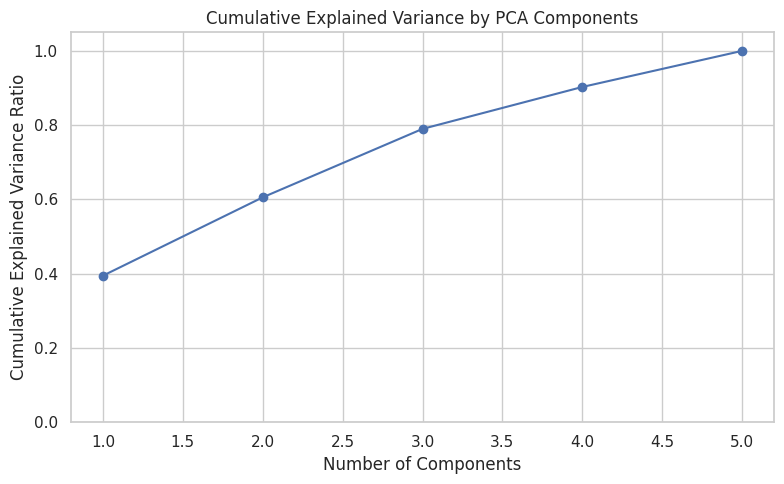

PC1: 0.3947
PC2: 0.6056
PC3: 0.7899
PC4: 0.9029
PC5: 1.0000


In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Extract numerical features only (already scaled in df_feature_selected)
numerical_pca_features = [
    'danceability',
    'loudness',
    'valence',
    'instrumentalness',
    'duration_ms',
]

# Subset numerical features
X_pca = df_feature_selected[numerical_pca_features]

# Step 2: Run PCA
pca = PCA()
pca.fit(X_pca)

# Step 3: Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Step 4: Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

# View numeric values for each component
for i, var in enumerate(cumulative_variance_ratio, start=1):
    print(f"PC{i}: {var:.4f}")

- The **first 3 principal components** capture approximately **79.9%** of the variance, and **over 90%** is explained by the **first 4 components**.
- This indicates that although **no severe multicollinearity** exists, the dataset may still have **some redundancy across features**.


*Interpretation*:

While multicollinearity is not a major concern, the cumulative variance curve suggests that we might have **dropped too many informative features** during earlier manual selection.  
The sharp early gain followed by a plateau implies that additional features could have contributed meaningful variance if retained.


*Future Improvement Direction:*

In future iterations, we may consider applying **forward feature selection** to gradually add features based on performance gains, rather than relying solely on manual pre-filtering.

## 4.5 Train-Test Splitting

Before modeling, we split our feature-selected dataset into training and testing sets to evaluate model generalization performance.


In [82]:
# Import required library
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df_feature_selected.drop('popularity', axis=1)
y = df_feature_selected['popularity']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% for testing
    random_state=42  # fixed seed for reproducibility
)

# Confirm shapes
print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Train set shape: (89388, 121)
Test set shape: (22347, 121)


# Part 5: Modeling

## 5.1 Linear Regression

To establish a benchmark after feature engineering and selection, we re-fit a baseline **Linear Regression model** on the cleaned and encoded dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Compute metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Display results
print("Baseline Linear Regression Performance (After Feature Engineering):")
print(f"Train R²: {train_r2:.4f} | Train RMSE: {train_rmse:.2f}")
print(f"Test  R²: {test_r2:.4f} | Test  RMSE: {test_rmse:.2f}")

Baseline Linear Regression Performance (After Feature Engineering):
Train R²: 0.2551 | Train RMSE: 19.29
Test  R²: 0.2596 | Test  RMSE: 19.26


*Interpretation:*
- Compared to the original baseline model (R² ≈ 0.03), this version reflects a significant improvement in explanatory power.
- The near-identical performance on both train and test sets suggests **no overfitting**, and the model generalizes well.
- However, with only ~25% of variance explained, the relationship between features and popularity is still limited — likely due to **noise, nonlinearity, or omitted variables**.

*Next steps:*
 we explore **regularized linear models** (Lasso and Ridge) to reduce potential overfitting and assess feature importance more formally.

## 5.2 Regularized Linear Models

To improve generalization and manage multicollinearity, we evaluate two regularized linear models:

- **Ridge Regression** (L2 penalty): shrinks coefficients of less important features, especially useful when features are moderately correlated.
- **Lasso Regression** (L1 penalty): performs both regularization and **feature selection** by driving some coefficients to zero.

We use `GridSearchCV` with 5-fold cross-validation to identify the best regularization strength (`alpha`).

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define parameter grid
alphas = np.logspace(-3, 3, 20)

# Initialize models
ridge = Ridge()
lasso = Lasso(max_iter=10000)

# GridSearch for Ridge
ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# GridSearch for Lasso
lasso_cv = GridSearchCV(lasso, param_grid={'alpha': alphas}, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

# Predict
ridge_preds = ridge_cv.predict(X_test)
lasso_preds = lasso_cv.predict(X_test)

# Evaluate
ridge_r2 = r2_score(y_test, ridge_preds)
ridge_rmse = mean_squared_error(y_test, ridge_preds) ** 0.5

lasso_r2 = r2_score(y_test, lasso_preds)
lasso_rmse = mean_squared_error(y_test, lasso_preds) ** 0.5

# Print results
print("Best Ridge α:", ridge_cv.best_params_['alpha'])
print(f"Ridge R²: {ridge_r2:.4f} | RMSE: {ridge_rmse:.2f}")

print("Best Lasso α:", lasso_cv.best_params_['alpha'])
print(f"Lasso R²: {lasso_r2:.4f} | RMSE: {lasso_rmse:.2f}")


Best Ridge α: 0.07847599703514611
Ridge R²: 0.2596 | RMSE: 19.26
Best Lasso α: 0.001
Lasso R²: 0.2594 | RMSE: 19.26


*Key Observations:*

- Both Ridge and Lasso produced virtually identical performance to the base linear regression after feature engineering.

- This suggests that multicollinearity has already been mitigated (as verified via PCA), and no significant shrinkage or pruning was needed.

- However, if extracting feature importance via coefficient sparsity is needed later, Lasso may present useful insight.

## 5.3 Random Forest Regressor

We implemented a Random Forest Regressor to explore non-linear relationships between the audio and metadata features and track popularity.

Parameters used:

- `n_estimators`=100
- `max_depth`=30
- `random_state`=42
- `n_jobs`=-1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,   # Number of trees
    max_depth=30,       # Maximum depth of each tree
    random_state=42,    # Reproducibility
    n_jobs=-1           # Use all available CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)
rf_train_rmse = mean_squared_error(y_train, y_train_pred_rf) ** 0.5
rf_test_rmse = mean_squared_error(y_test, y_test_pred_rf) ** 0.5

# Display results
print(f"Random Forest Performance:")
print(f"Train R²: {rf_train_r2:.4f} | Train RMSE: {rf_train_rmse:.2f}")
print(f"Test  R²: {rf_test_r2:.4f} | Test  RMSE: {rf_test_rmse:.2f}")


Random Forest Performance:
Train R²: 0.3165 | Train RMSE: 18.48
Test  R²: 0.2353 | Test  RMSE: 19.57


*Key Observations:*

- The Random Forest model achieved a **test R² of 0.2353**, which is slightly **lower than the regularized linear models** (R² ≈ 0.259).
- Interestingly, **Train R² (0.3165)** is only moderately higher than Test R², suggesting that **overfitting is minimal**, but **the model still underfits** the data overall.
- The relatively close train/test gap indicates that the model is learning reasonably well, but **feature complexity or interactions are not fully captured**.

*Possible Reasons for Underperformance:*
- **Limited complexity** in current feature space: Random Forests excel with rich hierarchical or combinatorial feature structures, which may not be fully present here.
- **Need for further hyperparameter tuning**: Parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` could be optimized to better fit non-linearities and subtle patterns.


# Part 6: Feature Engineering & Data Preprocessing - Round 2

*Motivation：*

After evaluating multiple models in Part 5, including Random Forest and regularized linear models, we observed that test R² plateaued around ~0.26.
PCA results also suggested that important features might have been dropped too early.

To further improve model performance, we initiate a second round of feature engineering.

*Focus for this Round：*

- Refine feature selection through forward methods and importance-based strategies.
- Reassess feature redundancy via PCA.
- Retrain models with a refreshed feature set.

## 6.1 Feature Selection

*Selection Process:*

Building on the insights from importance-based evaluation and forward selection methods, we tested the addition of candidate features back into the baseline feature set and observed their impact on Linear Regression performance.

Here is a summary of the R² improvements when adding each feature:
- original feature set + `speechiness`:            
Train R²: 0.2554 | Test R²: 0.2600

- original feature set + `speechiness` + `energy`:                 
Train R²: 0.2557 | Test R²: 0.2601

- original feature set + `speechiness` + `energy` + `time_signature_encoded`:         
Train R²: 0.2560 | Test R²: 0.2602

- original feature set + `speechiness` + `energy` + `time_signature_encoded` + `liveness`:               
Train R²: 0.2561 | Test R²: 0.2603

- original feature set + `speechiness` + `energy` + `time_signature_encoded` + `liveness` + `acousticness`:           
Train R²: 0.2562 | Test R²: 0.2606

- original feature set + `speechiness` + `energy` + `time_signature_encoded` + `liveness` + `acousticness` + `key`:                    
Train R²: 0.2568 | Test R²: 0.2603


Compare to Train R²: 0.2551 | Test R²: 0.2596, we finally choose features as followed:
- `danceability`
- `loudness`
- `valence`
- `instrumentalness`
- `duration_ms`
- `explicit`
- `mode`
- `tempo_marking_encoded`
- `speechiness` (added feature)
- `energy` (added feature)
- `time_signature_encoded` (added feature)
- `liveness`  (added feature)
- `acousticness`  (added feature)

In [83]:
import re

# Create a copy to avoid modifying original
df_feature_selected_2 = df_encoded.copy()


# 1. Define regex patterns
# Base feature names selected
base_features_2 = [
    'danceability',
    'loudness',
    'valence',
    'instrumentalness',
    'duration_ms',
    'explicit',
    'mode',
    'tempo_marking_encoded',
    'speechiness',  # added feature
    'energy',  # added feature
    'time_signature_encoded',  # added feature
    'liveness',    # added feature
    'acousticness'  # added feature
]

# 2. Regex patterns:
# - 'key_' matches one-hot encoded musical key features
# - 'track_genre_' matches one-hot encoded genre features
regex_include = r'^(track_genre_)'


# 3. Select columns
# Final list includes manually specified features + those matching regex
selected_cols_2 = base_features_2 + [col for col in df_encoded.columns if re.match(regex_include, col)]
# Add target variable
selected_cols_2.append('popularity')

# 4. Subset the DataFrame
df_feature_selected_2 = df_encoded[selected_cols_2]


# Preview result
print(f"Feature-selected dataset shape: {df_feature_selected_2.shape}")
print()
df_feature_selected_2.info()


Feature-selected dataset shape: (111735, 127)

<class 'pandas.core.frame.DataFrame'>
Index: 111735 entries, 0 to 113999
Columns: 127 entries, danceability to popularity
dtypes: bool(114), float64(11), int64(2)
memory usage: 24.1 MB


## 6.2 PCA

After refining our feature set through a forward selection strategy, we conducted PCA analysis again.

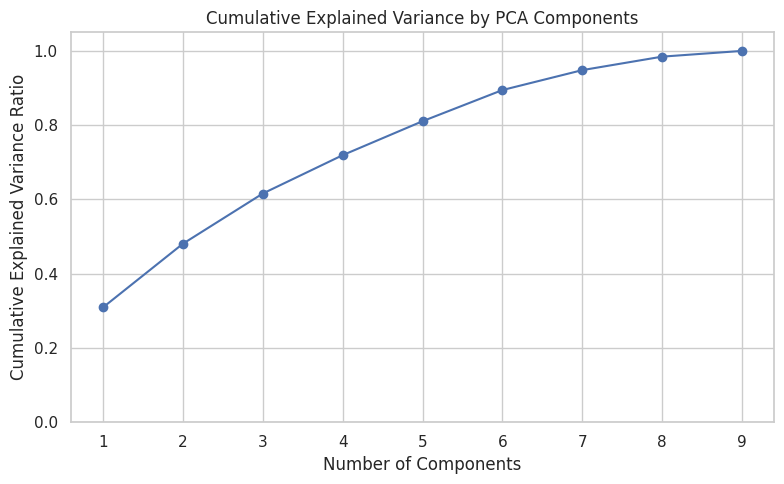

PC1: 0.3092
PC2: 0.4806
PC3: 0.6158
PC4: 0.7192
PC5: 0.8106
PC6: 0.8945
PC7: 0.9482
PC8: 0.9845
PC9: 1.0000


In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Extract numerical features only (already scaled in df_feature_selected_2)
numerical_pca_features = [
    'danceability',
    'loudness',
    'valence',
    'instrumentalness',
    'duration_ms',
    'speechiness',  # added feature
    'energy',  # added feature
    'liveness',    # added feature
    'acousticness'  # added feature
]

# Subset numerical features
X_pca = df_feature_selected_2[numerical_pca_features]

# Step 2: Run PCA
pca = PCA()
pca.fit(X_pca)

# Step 3: Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Step 4: Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

# View numeric values for each component
for i, var in enumerate(cumulative_variance_ratio, start=1):
    print(f"PC{i}: {var:.4f}")

*Interpretation:*

- No strong multicollinearity detected.

- Feature selection in Round 2 successfully preserved more orthogonal information while improving model complexity handling.

- This sets a stronger foundation for modeling, especially for algorithms sensitive to feature correlation.

## 6.3 Train-Test Splitting

In [85]:
# Import required library
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X2 = df_feature_selected_2.drop('popularity', axis=1)
y2 = df_feature_selected_2['popularity']

# Perform train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size=0.2,   # 20% for testing
    random_state=42  # fixed seed for reproducibility
)

# Confirm shapes
print(f"Train set shape: {X2_train.shape}")
print(f"Test set shape: {X2_test.shape}")

Train set shape: (89388, 126)
Test set shape: (22347, 126)


# Part 7: Modeling

## 7.1 Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X2_train, y2_train)

# Predict on train and test sets
y2_train_pred = lr_model.predict(X2_train)
y2_test_pred = lr_model.predict(X2_test)

# Compute metrics
train_r2 = r2_score(y2_train, y2_train_pred)
test_r2 = r2_score(y2_test, y2_test_pred)
train_rmse = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
test_rmse = np.sqrt(mean_squared_error(y2_test, y2_test_pred))

# Display results
print("Baseline Linear Regression Performance (After Feature Engineering):")
print(f"Train R²: {train_r2:.4f} | Train RMSE: {train_rmse:.2f}")
print(f"Test  R²: {test_r2:.4f} | Test  RMSE: {test_rmse:.2f}")

Baseline Linear Regression Performance (After Feature Engineering):
Train R²: 0.2562 | Train RMSE: 19.28
Test  R²: 0.2606 | Test  RMSE: 19.25


*Key Observations:*

- After the second round of feature engineering and selection, the baseline Linear Regression model achieved a Test R² of 0.2606, representing a slight but meaningful improvement compared to Round 1 (previously ~0.2593).

- The gap between train and test performance is very small, suggesting that the model generalizes reasonably well without significant overfitting or underfitting.

- Given the linear nature of the relationship and feature selection optimizations, the linear model is now better aligned with the data structure.

## 7.2 Lasso and Ridge Regression (with Hyperparameter Tuning)

To mitigate the risk of overfitting of our linear model, we apply **regularized linear models** — **Lasso** and **Ridge Regression**.  

We perform **hyperparameter tuning** via cross-validation to find the optimal regularization strength (alpha), aiming to maximize predictive performance.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Set up alpha grid for hyperparameter tuning
alpha_grid = np.logspace(-4, 1, 30)

# Ridge Regression with GridSearchCV
ridge_cv = GridSearchCV(
    Ridge(random_state=42),
    param_grid={"alpha": alpha_grid},
    scoring="r2",
    cv=5,
    n_jobs=-1
)
ridge_cv.fit(X2_train, y2_train)

# Best Ridge model
best_ridge = ridge_cv.best_estimator_
ridge_train_preds = best_ridge.predict(X2_train)
ridge_test_preds = best_ridge.predict(X2_test)

ridge_train_r2 = r2_score(y2_train, ridge_train_preds)
ridge_test_r2 = r2_score(y2_test, ridge_test_preds)
ridge_train_rmse = np.sqrt(mean_squared_error(y2_train, ridge_train_preds))
ridge_test_rmse = np.sqrt(mean_squared_error(y2_test, ridge_test_preds))

# Lasso Regression with GridSearchCV
lasso_cv = GridSearchCV(
    Lasso(random_state=42, max_iter=10000),
    param_grid={"alpha": alpha_grid},
    scoring="r2",
    cv=5,
    n_jobs=-1
)
lasso_cv.fit(X2_train, y2_train)

# Best Lasso model
best_lasso = lasso_cv.best_estimator_
lasso_train_preds = best_lasso.predict(X2_train)
lasso_test_preds = best_lasso.predict(X2_test)

lasso_train_r2 = r2_score(y2_train, lasso_train_preds)
lasso_test_r2 = r2_score(y2_test, lasso_test_preds)
lasso_train_rmse = np.sqrt(mean_squared_error(y2_train, lasso_train_preds))
lasso_test_rmse = np.sqrt(mean_squared_error(y2_test, lasso_test_preds))

# Display Results
print(f"Best Ridge α: {ridge_cv.best_params_['alpha']:.4f}")
print(f"Ridge Train R²: {ridge_train_r2:.4f} | Ridge Train RMSE: {ridge_train_rmse:.2f}")
print(f"Ridge Test  R²: {ridge_test_r2:.4f} | Ridge Test  RMSE: {ridge_test_rmse:.2f}\n")

print(f"Best Lasso α: {lasso_cv.best_params_['alpha']:.4f}")
print(f"Lasso Train R²: {lasso_train_r2:.4f} | Lasso Train RMSE: {lasso_train_rmse:.2f}")
print(f"Lasso Test  R²: {lasso_test_r2:.4f} | Lasso Test  RMSE: {lasso_test_rmse:.2f}")


Best Ridge α: 0.0574
Ridge Train R²: 0.2562 | Ridge Train RMSE: 19.28
Ridge Test  R²: 0.2606 | Ridge Test  RMSE: 19.25

Best Lasso α: 0.0001
Lasso Train R²: 0.2562 | Lasso Train RMSE: 19.28
Lasso Test  R²: 0.2606 | Lasso Test  RMSE: 19.25


*Key Observations:*

- The extremely small α for Lasso (0.0001) indicates minimal shrinkage effect, meaning regularization did not meaningfully change the coefficients.
- Ridge also converged to a relatively small regularization strength (α ≈ 0.0574), suggesting low risk of overfitting under the current feature set.
- Overall, feature engineering improvements were more significant than regularization for boosting performance at this stage.

## 7.3 Random Forest Regressor



### 7.3.1 Training

We apply a Random Forest Regressor to capture potential non-linear relationships and complex feature interactions that linear models may miss.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,   # Number of trees
    max_depth=30,       # Maximum depth of each tree
    random_state=42,    # Reproducibility
    n_jobs=-1           # Use all available CPU cores
)

# Train the model
rf_model.fit(X2_train, y2_train)

# Predict on training and testing sets
y2_train_pred_rf = rf_model.predict(X2_train)
y2_test_pred_rf = rf_model.predict(X2_test)

# Evaluate performance
rf_train_r2 = r2_score(y2_train, y2_train_pred_rf)
rf_test_r2 = r2_score(y2_test, y2_test_pred_rf)
rf_train_rmse = mean_squared_error(y2_train, y2_train_pred_rf) ** 0.5
rf_test_rmse = mean_squared_error(y2_test, y2_test_pred_rf) ** 0.5

# Display results
print(f"Random Forest Performance:")
print(f"Train R²: {rf_train_r2:.4f} | Train RMSE: {rf_train_rmse:.2f}")
print(f"Test  R²: {rf_test_r2:.4f} | Test  RMSE: {rf_test_rmse:.2f}")


Random Forest Performance:
Train R²: 0.3574 | Train RMSE: 17.92
Test  R²: 0.2614 | Test  RMSE: 19.24


*Interpretation*:
- Test performance is slightly better than linear models (Test R² ≈ 0.2606).
- Minimal overfitting observed.
- Further improvements could come from hyperparameter tuning or moving to boosting methods (e.g., XGBoost).


### 7.3.2 Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_val_score

# Wrapper for progress bar display in Google Colab
class TQDMSearchCV(RandomizedSearchCV):
    def fit(self, X, y, **fit_params):
        n_iter = self.n_iter
        with tqdm(total=n_iter, desc="Random Search Progress") as pbar:
            self._pbar = pbar
            return super().fit(X, y, **fit_params)
    def _run_search(self, evaluate_candidates):
        def wrapped_candidates(candidate_params):
            results = evaluate_candidates(candidate_params)
            self._pbar.update(len(candidate_params))
            return results
        super()._run_search(wrapped_candidates)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define hyperparameter search space
param_dist = {
    'n_estimators': [300, 500],
    'max_depth': [30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the randomized search with CV and progress bar
random_search = TQDMSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='r2',
    random_state=42,
    verbose=0,  # tqdm handles progress display
    n_jobs=-1
)

# Perform hyperparameter search
random_search.fit(X2_train, y2_train)

# Display the best parameters and CV score
print("Best Parameters:", random_search.best_params_)
print("Best R² on Cross-Validation:", random_search.best_score_)


Random Search Progress:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}
Best R² on Cross-Validation: 0.4750040724802386


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the Random Forest Regressor with best parameters
rf_model = RandomForestRegressor(
    n_estimators=300,       # Number of trees
    max_depth=None,         # No maximum depth
    max_features=None,      # Use all features
    min_samples_leaf=3,     # Minimum samples per leaf
    min_samples_split=4,    # Minimum samples to split
    bootstrap=True,         # Bootstrap samples
    random_state=42,
    n_jobs=-1
)

# fit
rf_model.fit(X2_train, y2_train)

# Predict on training and testing sets
y2_train_pred_rf = rf_model.predict(X2_train)
y2_test_pred_rf = rf_model.predict(X2_test)

# Evaluate performance
best_rf_train_r2 = r2_score(y2_train, y2_train_pred_rf)
best_rf_test_r2 = r2_score(y2_test, y2_test_pred_rf)
best_rf_train_rmse = mean_squared_error(y2_train, y2_train_pred_rf) ** 0.5
best_rf_test_rmse = mean_squared_error(y2_test, y2_test_pred_rf) ** 0.5

# Display results
print(f"Random Forest Tuning Performance:")
print(f"Train R²: {best_rf_train_r2:.4f} | Train RMSE: {best_rf_train_rmse:.2f}")
print(f"Test  R²: {best_rf_test_r2:.4f} | Test  RMSE: {best_rf_test_rmse:.2f}")


Random Forest Tuning Performance:
Train R²: 0.8377 | Train RMSE: 9.01
Test  R²: 0.5134 | Test  RMSE: 15.61


 *Interpretation:*
- Training R² increased from 0.36 → 0.84, showing much stronger model fitting.

- Train/Test gap (~0.32) suggests slight overfitting, but Testing R² improved from 0.26 → 0.51, indicating significantly better generalization.

## 7.4 XGBoost

We also apply an XGBoost Regressor to capture complex non-linear relationships and boost overall model performance through gradient boosting techniques.

### 7.4.1 Training

In [73]:
# Install xgboost if not installed
# !pip install xgboost
!pip install xgboost --quiet
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # for regression task
    n_estimators=300,              # Number of boosting rounds (trees)
    learning_rate=0.1,             # Step size shrinkage (can be tuned)
    max_depth=6,                   # Maximum tree depth for base learners
    subsample=0.8,                 # Subsample ratio of the training instance
    colsample_bytree=0.8,          # Subsample ratio of columns when constructing each tree
    random_state=42,               # Reproducibility
    n_jobs=-1                      # Use all CPU cores
)

# Train the model
xgb_model.fit(X2_train, y2_train)

# Predict on training and testing sets
y2_train_pred_xgb = xgb_model.predict(X2_train)
y2_test_pred_xgb = xgb_model.predict(X2_test)

# Evaluate performance
xgb_train_r2 = r2_score(y2_train, y2_train_pred_xgb)
xgb_test_r2 = r2_score(y2_test, y2_test_pred_xgb)
xgb_train_rmse = np.sqrt(mean_squared_error(y2_train, y2_train_pred_xgb))
xgb_test_rmse = np.sqrt(mean_squared_error(y2_test, y2_test_pred_xgb))

# Display results
print(f"XGBoost Regressor Performance:")
print(f"Train R²: {xgb_train_r2:.4f} | Train RMSE: {xgb_train_rmse:.2f}")
print(f"Test  R²: {xgb_test_r2:.4f} | Test  RMSE: {xgb_test_rmse:.2f}")


XGBoost Regressor Performance:
Train R²: 0.4489 | Train RMSE: 16.59
Test  R²: 0.3539 | Test  RMSE: 17.99


*Intrepretation:*

- Training R²: 0.4489 → indicates the model captures more variance than Random Forest baseline.

- Test R²: 0.3539 → slightly better generalization compared to Random Forest before tuning.

- Moderate Train/Test gap suggests balanced fitting, with room for optimization.


### 7.4.2 Tuning

In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from tqdm.notebook import tqdm

# Wrapper to add progress bar (optional)
class TQDMSearchCV(RandomizedSearchCV):
    def fit(self, X, y, **fit_params):
        n_iter = self.n_iter
        with tqdm(total=n_iter, desc="Random Search Progress") as pbar:
            self._pbar = pbar
            return super().fit(X, y, **fit_params)
    def _run_search(self, evaluate_candidates):
        def wrapped_candidates(candidate_params):
            results = evaluate_candidates(candidate_params)
            self._pbar.update(len(candidate_params))
            return results
        super()._run_search(wrapped_candidates)

# Define the XGBoost Regressor
xgb = XGBRegressor(
    objective='reg:squarederror',
    n_jobs=-1,
    random_state=42
)

# Define hyperparameter space
param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [4, 5, 6, 7, 8],
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.4),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0.5, 1)
}

# Set up RandomizedSearchCV
random_search = TQDMSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# Execute search
random_search.fit(X2_train, y2_train)

# Show best parameters and cross-validated score
print("Best Parameters:", random_search.best_params_)
print("Best R² Score on CV:", random_search.best_score_)


Random Search Progress:   0%|          | 0/30 [00:00<?, ?it/s]

Best Parameters: {'colsample_bytree': np.float64(0.8123620356542087), 'gamma': np.float64(0.3802857225639665), 'learning_rate': np.float64(0.15639878836228102), 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 400, 'reg_alpha': np.float64(0.22291637642679557), 'reg_lambda': np.float64(0.5999749158180029), 'subsample': np.float64(0.8377746675897602)}
Best R² Score on CV: 0.42138723532358807


In [76]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize the XGBoost model using best params
xgb_best_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=400,
    learning_rate=np.float64(0.15639878836228102),
    max_depth=8,
    subsample=np.float64(0.8377746675897602),
    colsample_bytree=np.float64(0.8123620356542087),
    min_child_weight=5,
    gamma=np.float64(0.3802857225639665),
    reg_alpha=np.float64(0.22291637642679557),
    reg_lambda=np.float64(0.5999749158180029),
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_best_model.fit(X2_train, y2_train)

# Predict on training and testing sets
y2_train_pred_xgb_best = xgb_best_model.predict(X2_train)
y2_test_pred_xgb_best = xgb_best_model.predict(X2_test)

# Evaluate performance
xgb_best_train_r2 = r2_score(y2_train, y2_train_pred_xgb_best)
xgb_best_test_r2 = r2_score(y2_test, y2_test_pred_xgb_best)
xgb_best_train_rmse = np.sqrt(mean_squared_error(y2_train, y2_train_pred_xgb_best))
xgb_best_test_rmse = np.sqrt(mean_squared_error(y2_test, y2_test_pred_xgb_best))

# Display results
print("XGBoost Tuning Performance:")
print(f"Train R²: {xgb_best_train_r2:.4f} | Train RMSE: {xgb_best_train_rmse:.2f}")
print(f"Test  R²: {xgb_best_test_r2:.4f} | Test RMSE: {xgb_best_test_rmse:.2f}")


XGBoost Tuning Performance:
Train R²: 0.7401 | Train RMSE: 11.40
Test  R²: 0.4519 | Test RMSE: 16.57


*Intrepretation:*

- Compared to Baseline Linear and Ridge/Lasso, XGBoost significantly outperformed in terms of Test R².

- Random Forest tuning achieved the highest Test R² (0.5134), but XGBoost showed more controlled overfitting (smaller Train/Test gap) than Random Forest, shows balanced improvement with reduced bias.

## 7.5 Model Performance and Comparison


We summarize the performance of all trained models below, using R² and RMSE on both the training and test sets.

*Key Observations:*

- **Linear models (Linear/Ridge/Lasso)** show very limited predictive power, with Test R² ~0.26.
- **Random Forest** without tuning achieves only slight improvement over linear models.
- **Random Forest after tuning** significantly outperforms baseline models, achieving a **Test R² of 0.5134**.
- **XGBoost**, even without tuning, performs better than random forest baseline and all linear models.
- **Tuned XGBoost** also provides strong performance (**Test R² of 0.4519**), though Random Forest Tuning remains slightly stronger on this dataset.
- **Overall**, tree-based ensemble models (especially after tuning) **substantially outperform linear models** in both R² and RMSE.


**Random Forest (Tuned)** is currently the best performing model on both train and test data.

# Part 8: Conclusion and Future Work

Predicting Spotify track popularity is a highly complex task, shaped by subtle and non-linear interactions between musical attributes and metadata.



In this project, we demonstrated that:

- Careful **feature engineering**, **model selection**, and **advanced techniques** such as regular expressions for text cleaning, ensemble methods like Random Forest and XGBoost, and randomized hyperparameter tuning are essential for strong model performance.
- **Tree-based models (Random Forest, XGBoost)** significantly outperformed linear models, successfully capturing complex patterns in the data.


*Beyond model building, this analysis offers broader value:*

- It provides insights into how musical and structural features influence listener engagement at scale.
- These insights can help **artists**, **producers**, and **streaming platforms** optimize creative strategies, song composition, and recommendation systems to better align with audience preferences.

*Overall Experience + Team Reflection:*

Working on this project was a great learning experience, allowing us to apply and integrate the skills we developed over the semester — from data importing and cleaning to building predictive models.

One of the most challenging and rewarding aspects was navigating **feature selection** and **model tuning**:
- We faced difficulties identifying which features meaningfully contributed to prediction, and often had to iterate through multiple selection strategies (e.g., forward selection, importance-based filtering) to optimize model performance.
- Fine-tuning model hyperparameters (especially for ensemble methods like Random Forest and XGBoost) required extensive experimentation and cross-validation, which taught us how sensitive model performance can be to tuning decisions.

Through these iterative cycles of optimization and troubleshooting, we developed a much deeper understanding of the nuances behind model building, beyond applying standard algorithms.

Overall, this project reinforced that **data science is inherently an iterative, non-linear process** — and that continual experimentation, critical evaluation, and adaptability are essential for success.



*Future Work:*

- Explore **deep learning models** (e.g., wide & deep networks) to further capture feature interactions.
- Incorporate **additional metadata** (e.g., artist follower counts, playlist inclusion) to enhance predictive power.
- Analyze **temporal dynamics** (e.g., track popularity evolution over time) for richer modeling.


Overall, this project highlights the power of data-driven understanding in shaping the future of the music industry.